In [3]:
# IMPORTS
import glob, os, sys, h5py
import numpy as np
sys.path.insert(0,'../../')
sys.path.insert(0,'/Library/TeX/texbin/')
sys.path.insert(0,'../../WaveformAnalysis')
sys.path.insert(0,'/home/tb829/project/purity-monitor/WaveformAnalysis/')
from Gat_HPC import Gat_HPC as Gat
from scipy.signal import find_peaks, find_peaks_cwt, peak_widths, peak_prominences
from natsort import natsorted
from scipy.optimize import curve_fit

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 100

In [4]:
def rebin(hx,h,bins):
    bins = int(bins)
    h_rebin=[]
    for i in range(int(len(h)/bins)):
        start_idx=i*bins
        end_idx=(i+1)*bins
        h_rebin.append(np.sum(h[start_idx:end_idx]))
    hx_rebin=range(len(h_rebin))
    return np.array(hx_rebin), np.array(h_rebin)

def gauss(x,a,mu,sigma): return (a*np.exp(-0.5*((x-mu)/sigma)**2))

def line(x,a,b): return a*(x-b)

['/Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/5.0kHz/mca_keith_30.00OV_0.h5', '/Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/5.0kHz/mca_keith_31.00OV_0.h5', '/Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/5.0kHz/mca_keith_32.00OV_0.h5', '/Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/5.0kHz/mca_keith_31.50OV_0.h5', '/Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/5.0kHz/mca_keith_30.50OV_0.h5', '/Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.9kHz/mca_keith_30.00OV_0.h5', '/Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.9kHz/mca_keith_31.00OV_0.h5', '/Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.9kHz/mca_keith_32.00OV_0.h5', '/Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.9kHz/mca_keith_31.50OV_0.h5', '/Users/tizi/Docum

IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 4 to 8


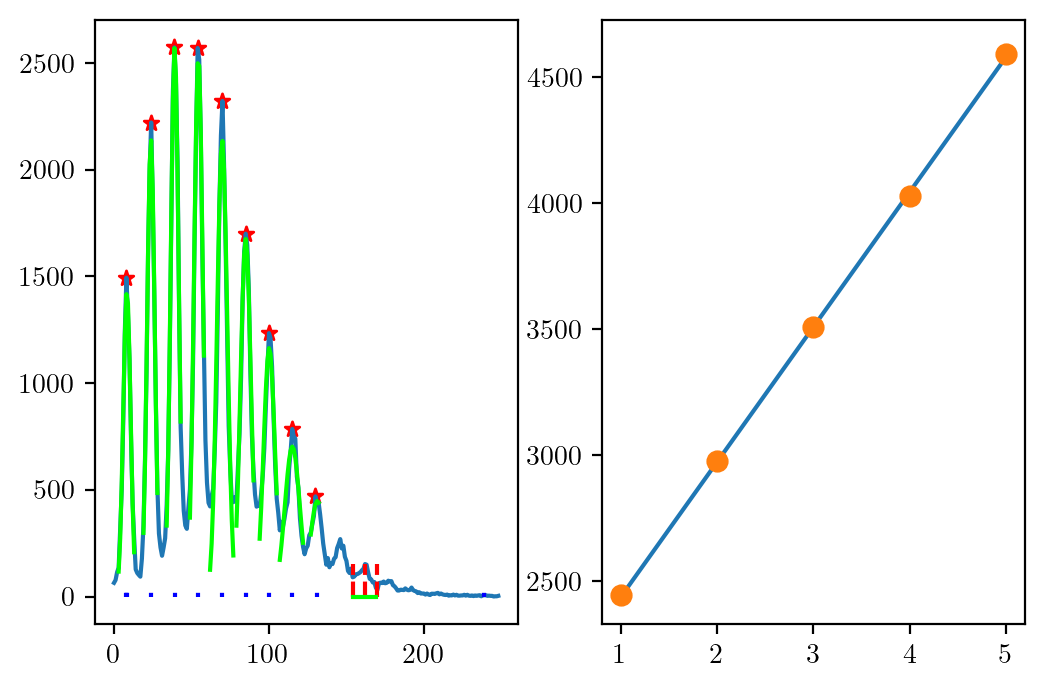

Gain 534.8640632429268 and sigma 0.046635639588939064 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/5.0kHz/mca_keith_30.00OV_0.h5
31.0  @  5.0


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 5 to 9


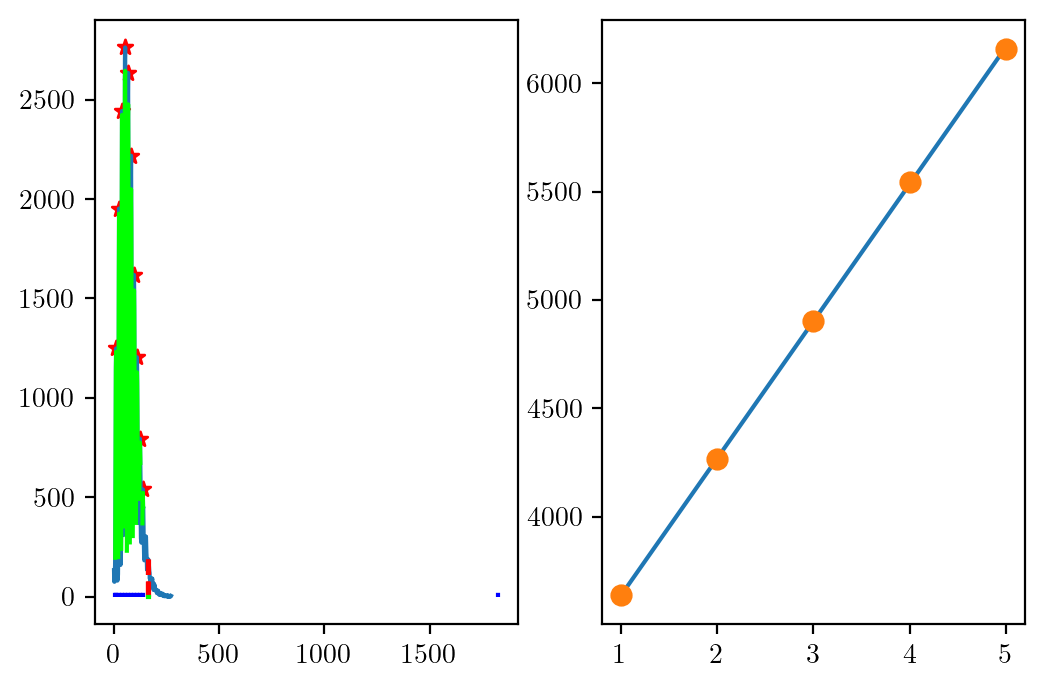

Gain 631.8034537143408 and sigma 0.03165774515908129 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/5.0kHz/mca_keith_31.00OV_0.h5
32.0  @  5.0


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 7 to 11


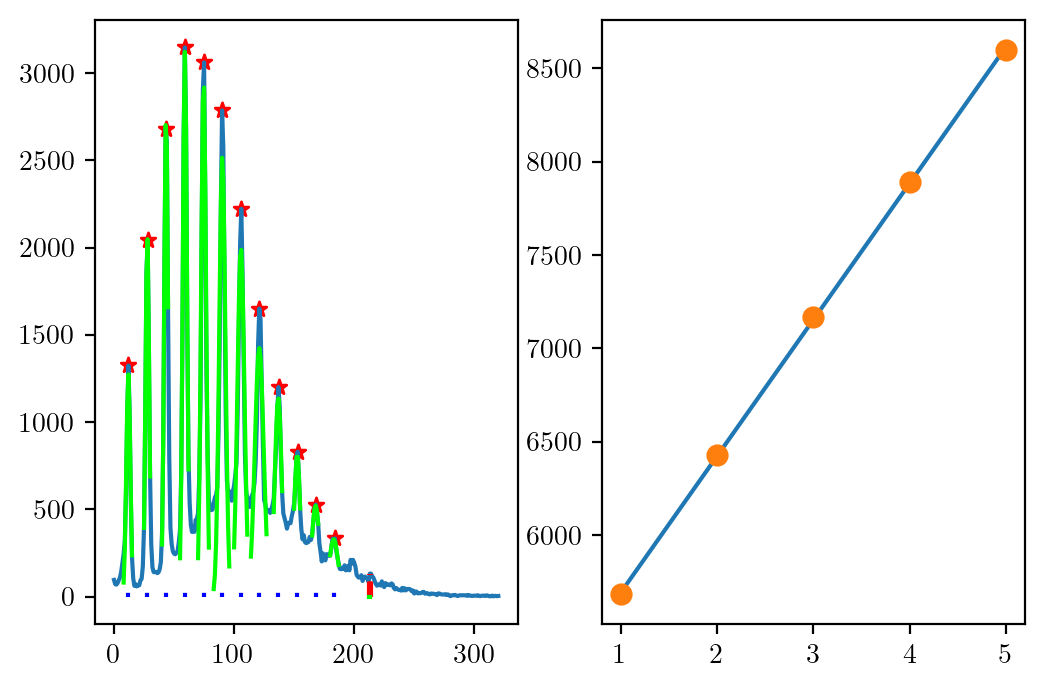

Gain 729.1374390868267 and sigma 0.05627980497660277 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/5.0kHz/mca_keith_32.00OV_0.h5
31.5  @  5.0


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 4 to 8


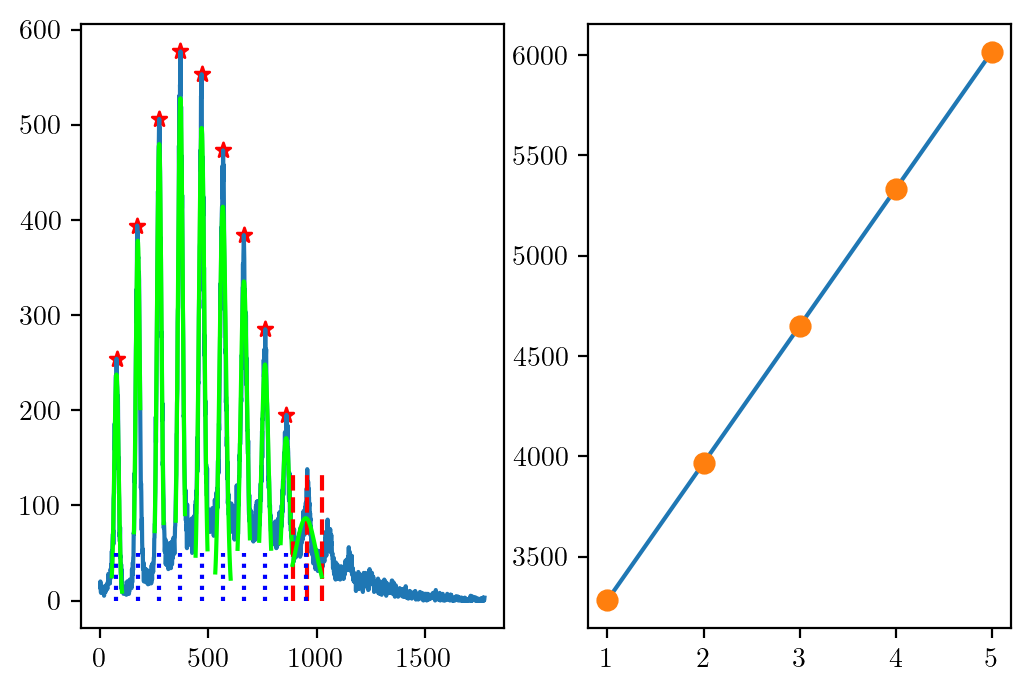

Gain 683.3641223353955 and sigma 0.0017036884320565757 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/5.0kHz/mca_keith_31.50OV_0.h5
30.5  @  5.0


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 5 to 9


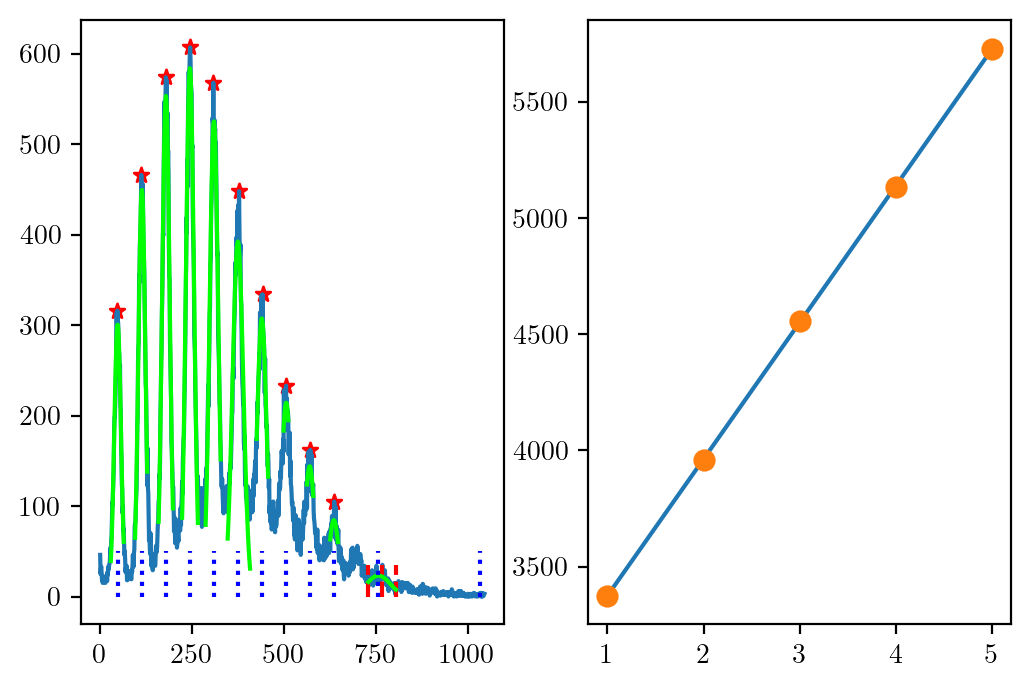

Gain 587.4431687908593 and sigma 0.020578408620310636 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/5.0kHz/mca_keith_30.50OV_0.h5
30.0  @  0.9


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 6 to 10


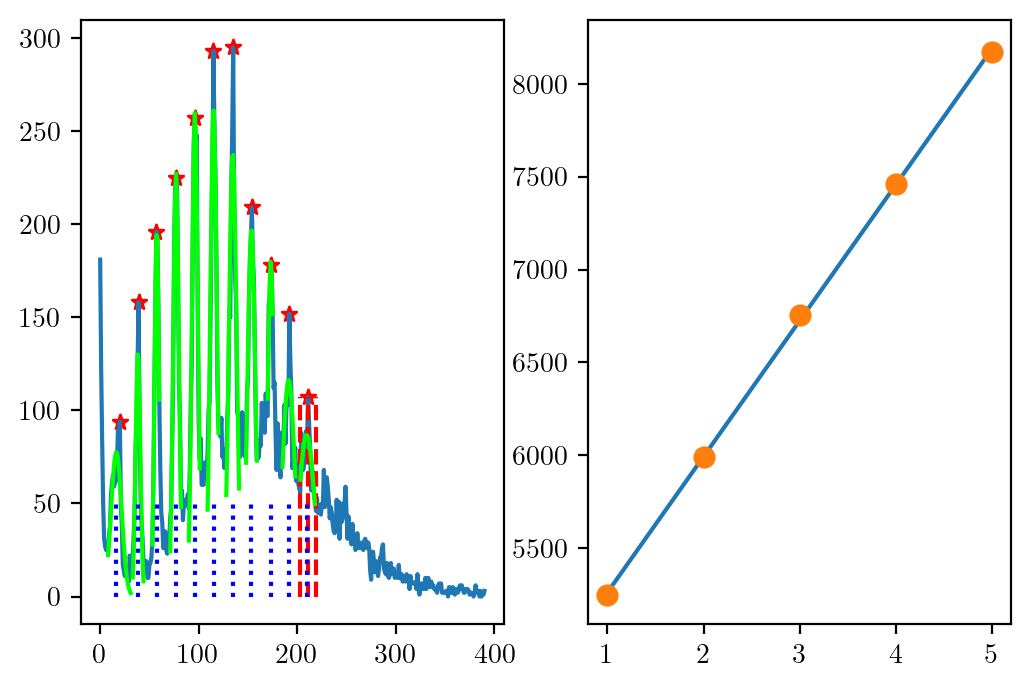

Gain 731.5893012780083 and sigma 0.0866423020367933 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.9kHz/mca_keith_30.00OV_0.h5
31.0  @  0.9


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 1 to 5


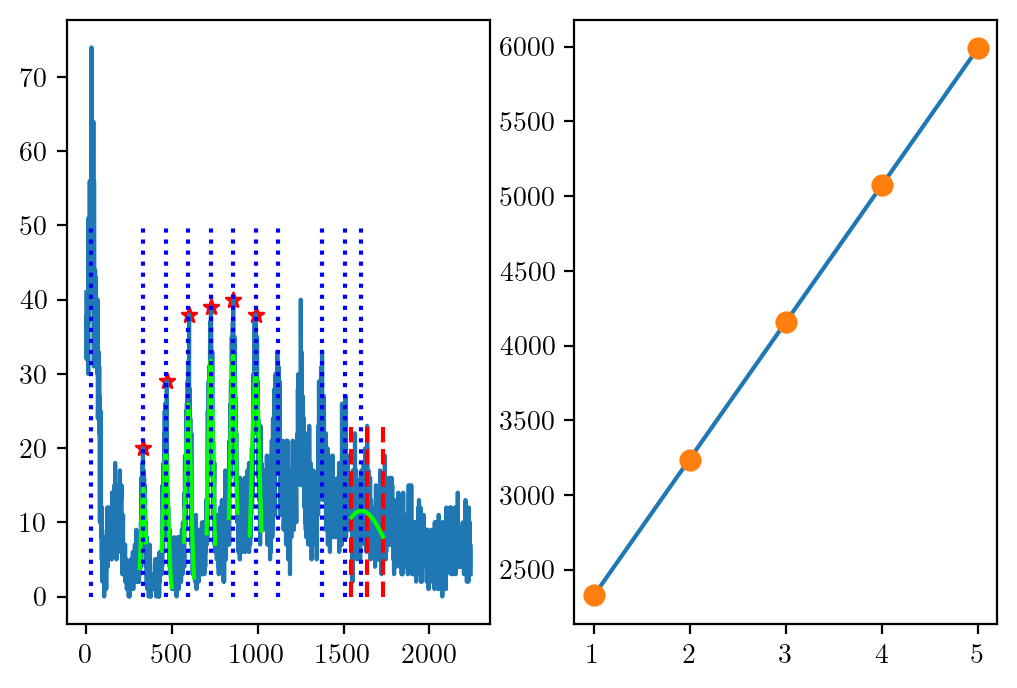

Gain 916.2535485104102 and sigma 0.005049362084778115 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.9kHz/mca_keith_31.00OV_0.h5
32.0  @  0.9


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 5 to 9


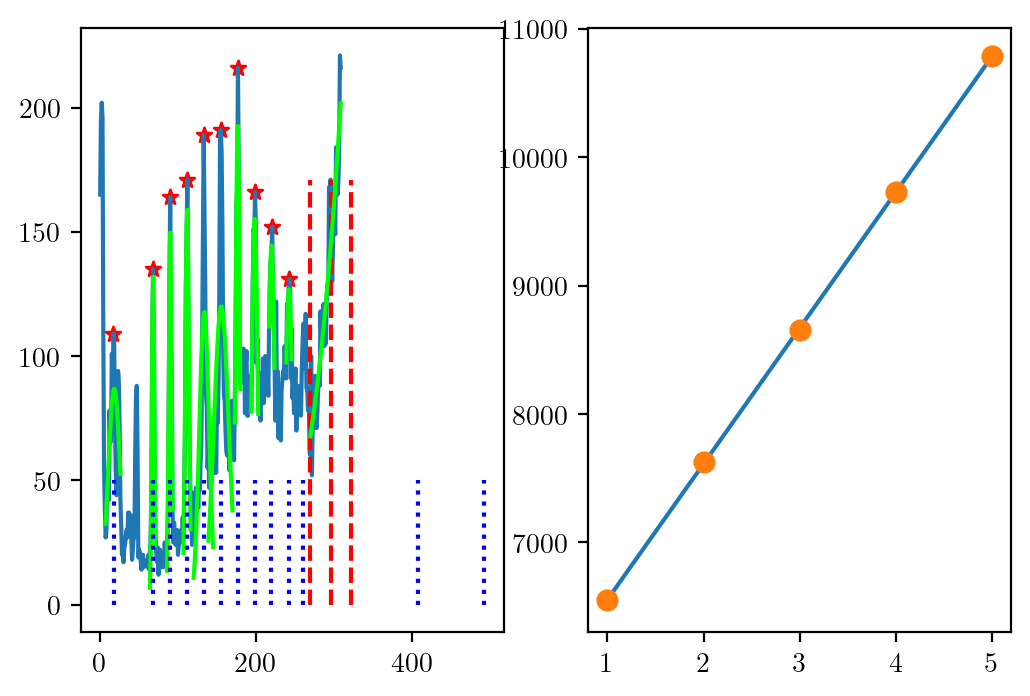

Gain 1056.5614435845891 and sigma 0.02654600528168208 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.9kHz/mca_keith_32.00OV_0.h5
31.5  @  0.9


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 2 to 6


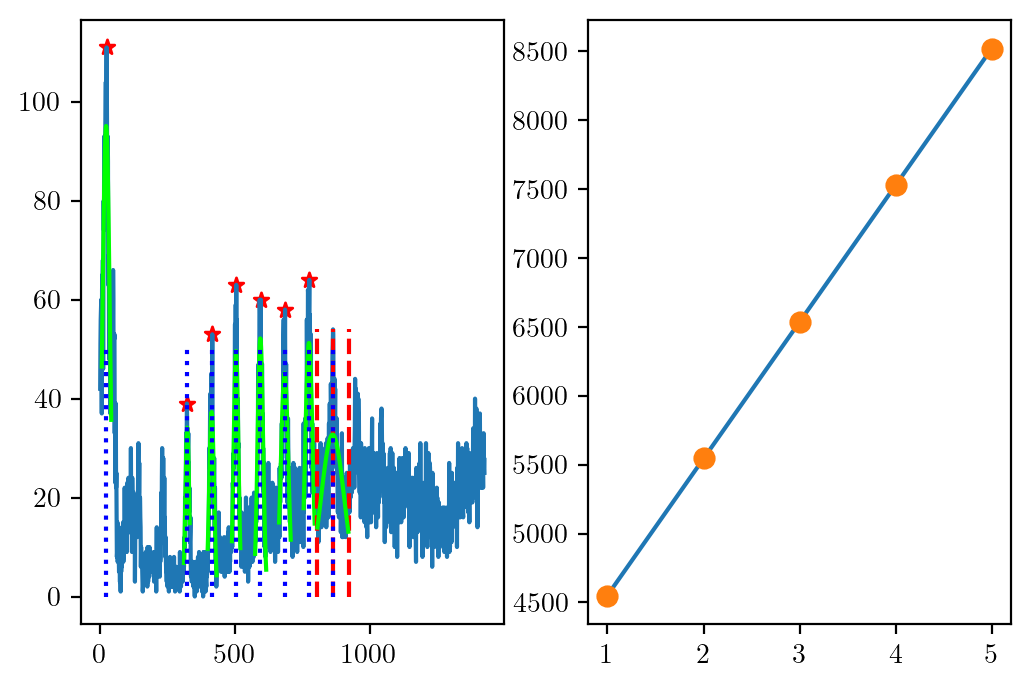

Gain 992.5559897725487 and sigma 0.004127995662860403 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.9kHz/mca_keith_31.50OV_0.h5
30.5  @  0.9


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 8 to 12


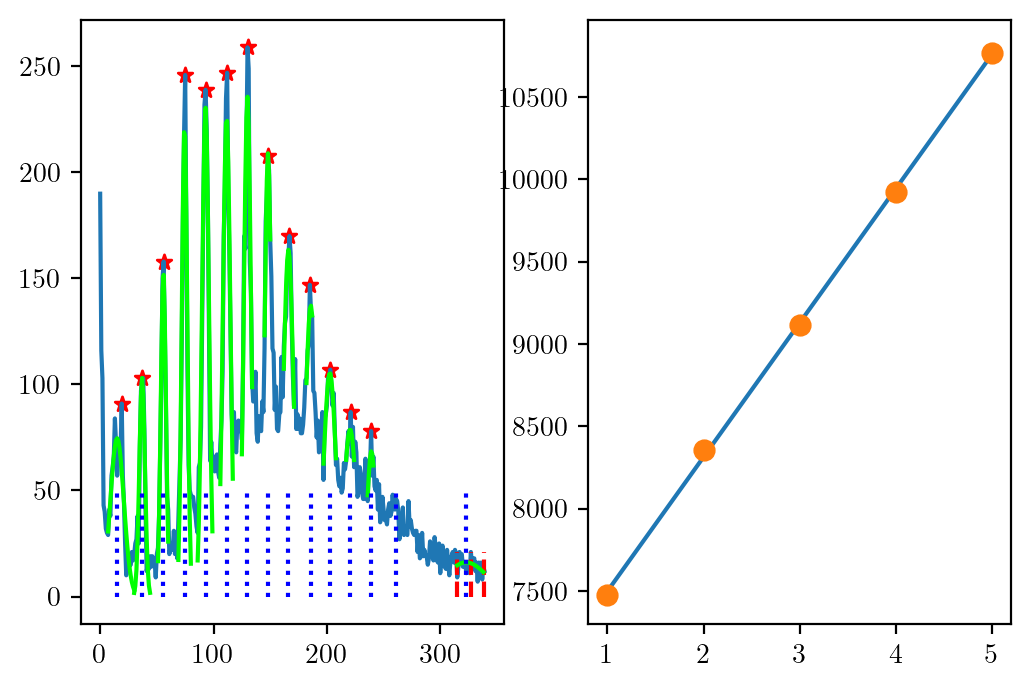

Gain 814.8034820264272 and sigma 0.14319364077248353 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.9kHz/mca_keith_30.50OV_0.h5
30.0  @  0.8


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 0 to 4


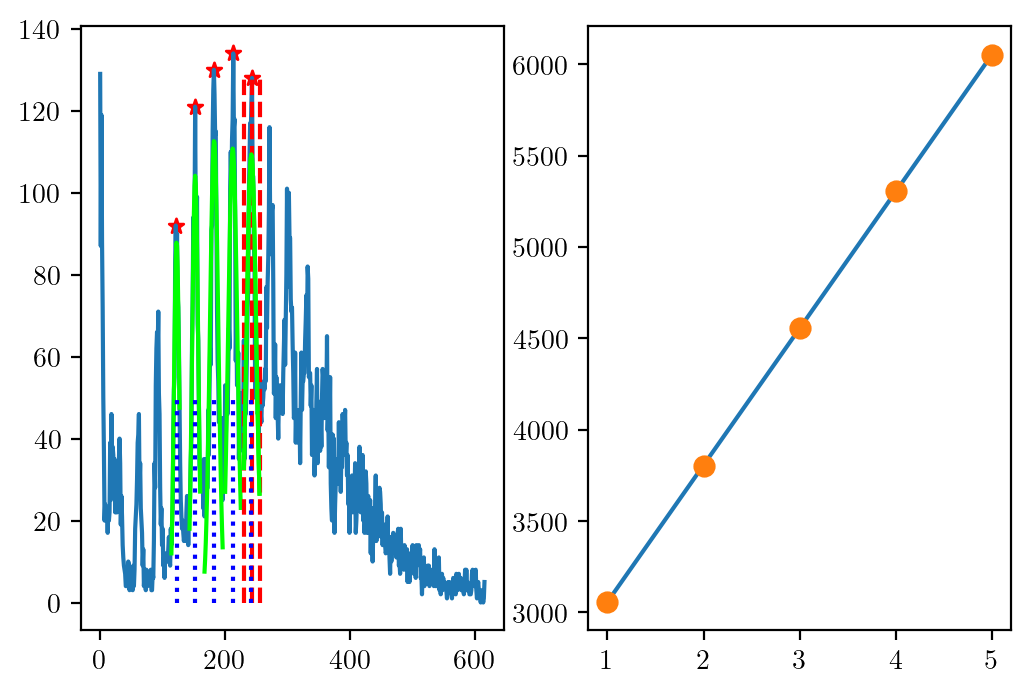

Gain 748.4729586892943 and sigma 0.010723632042719623 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.8kHz/mca_keith_30.00OV_0.h5
31.0  @  0.8


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 4 to 8


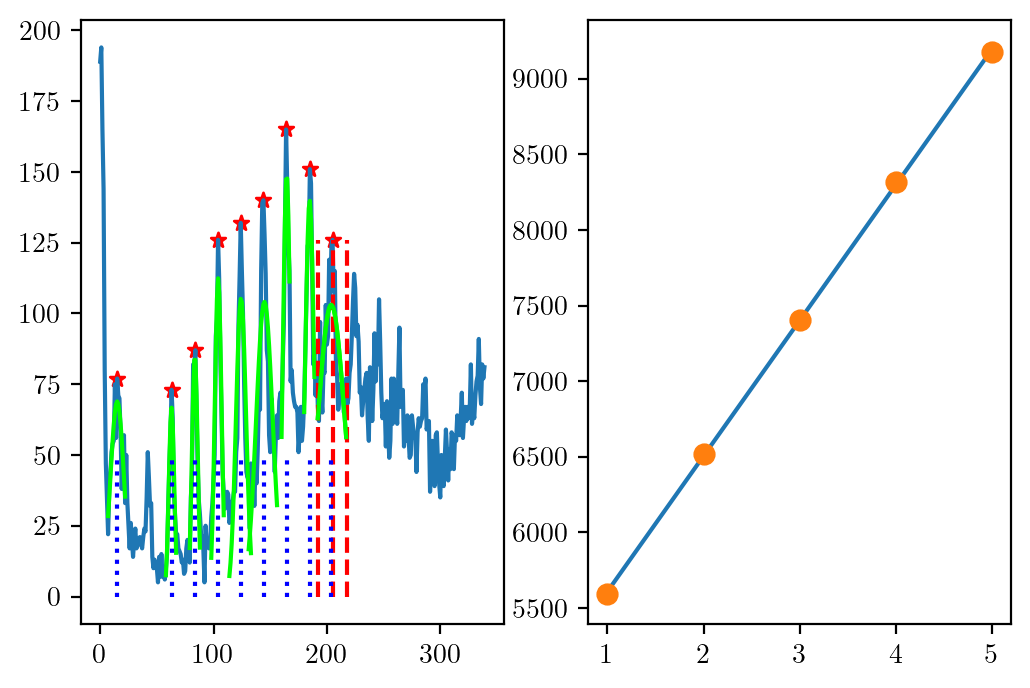

Gain 895.7725616898342 and sigma 0.059823794003113794 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.8kHz/mca_keith_31.00OV_0.h5
32.0  @  0.8


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 4 to 8


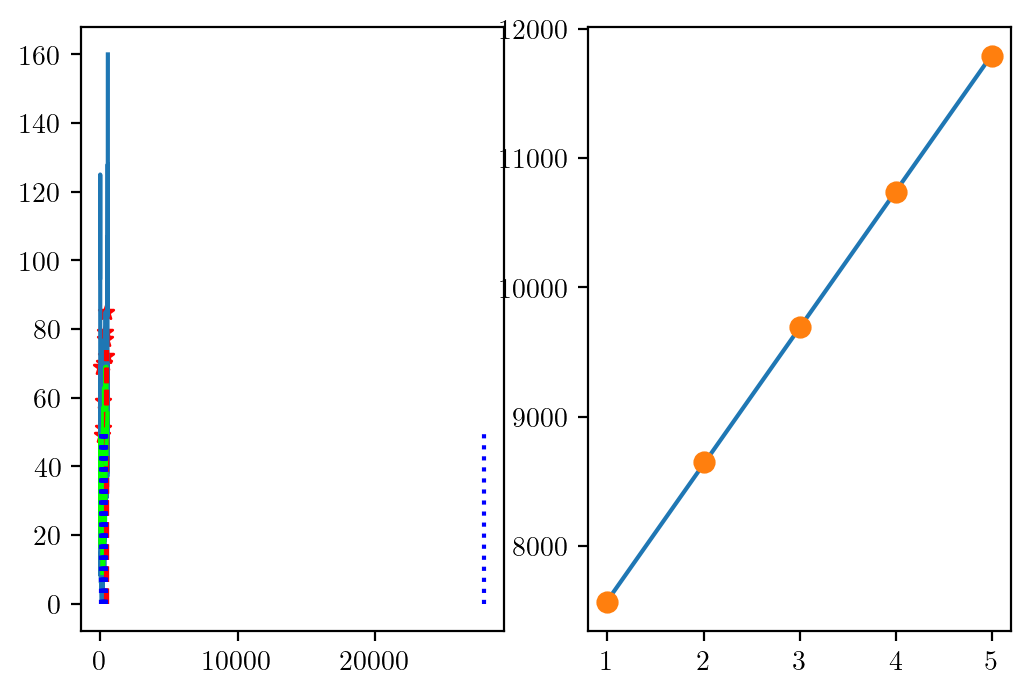

Gain 1055.8005363969282 and sigma 0.03652613083975542 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.8kHz/mca_keith_32.00OV_0.h5
31.5  @  0.8


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 2 to 6


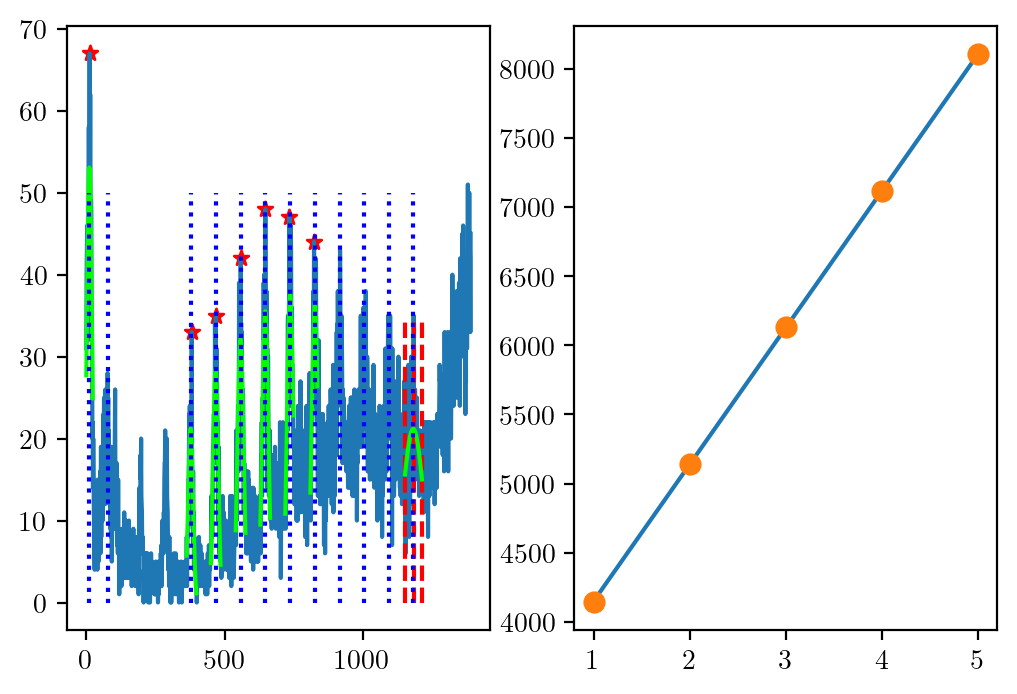

Gain 988.7514168804701 and sigma 0.006565228474023497 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.8kHz/mca_keith_31.50OV_0.h5
30.5  @  0.8


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 3 to 7


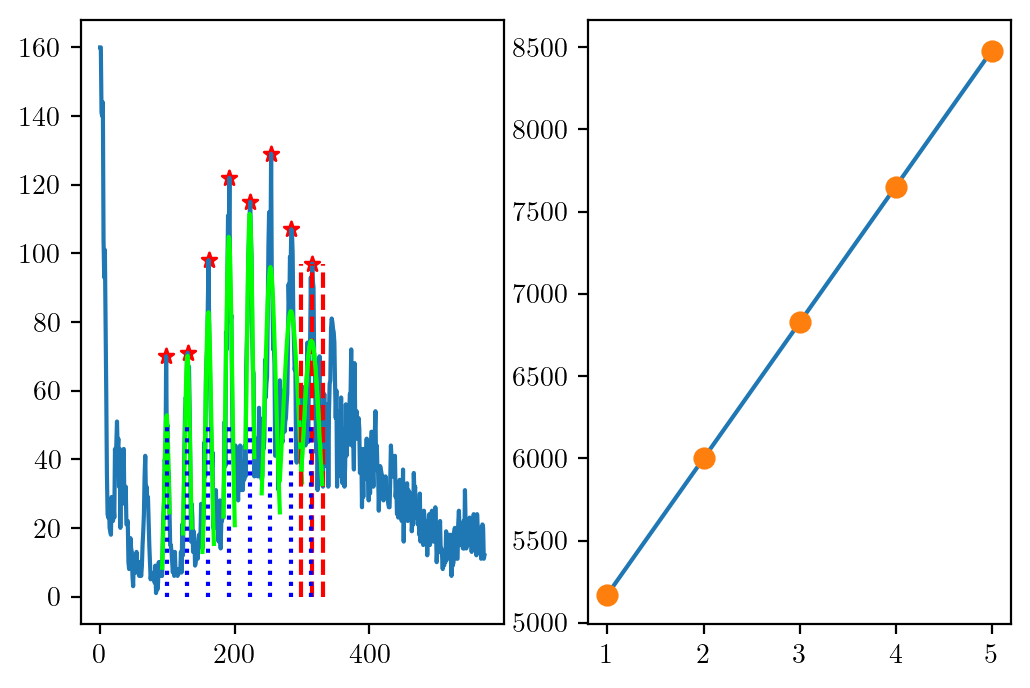

Gain 826.4510901174921 and sigma 0.018577432040545478 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.8kHz/mca_keith_30.50OV_0.h5
30.0  @  0.7


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 2 to 6


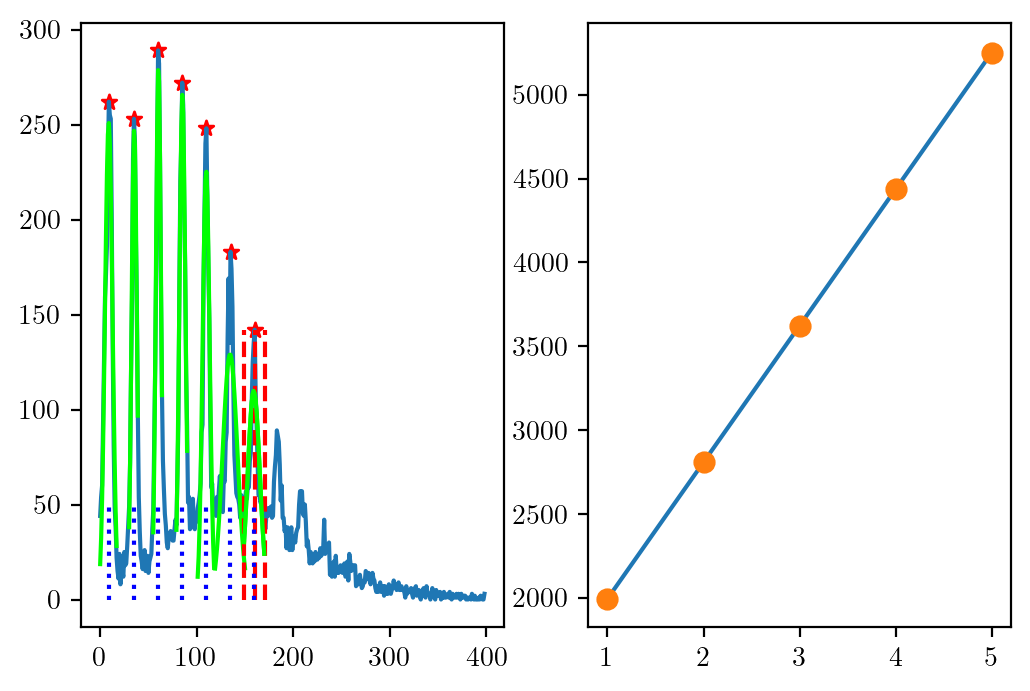

Gain 814.4475133862587 and sigma 0.004299903013106855 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.7kHz/mca_keith_30.00OV_0.h5
31.0  @  0.7


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 1 to 5


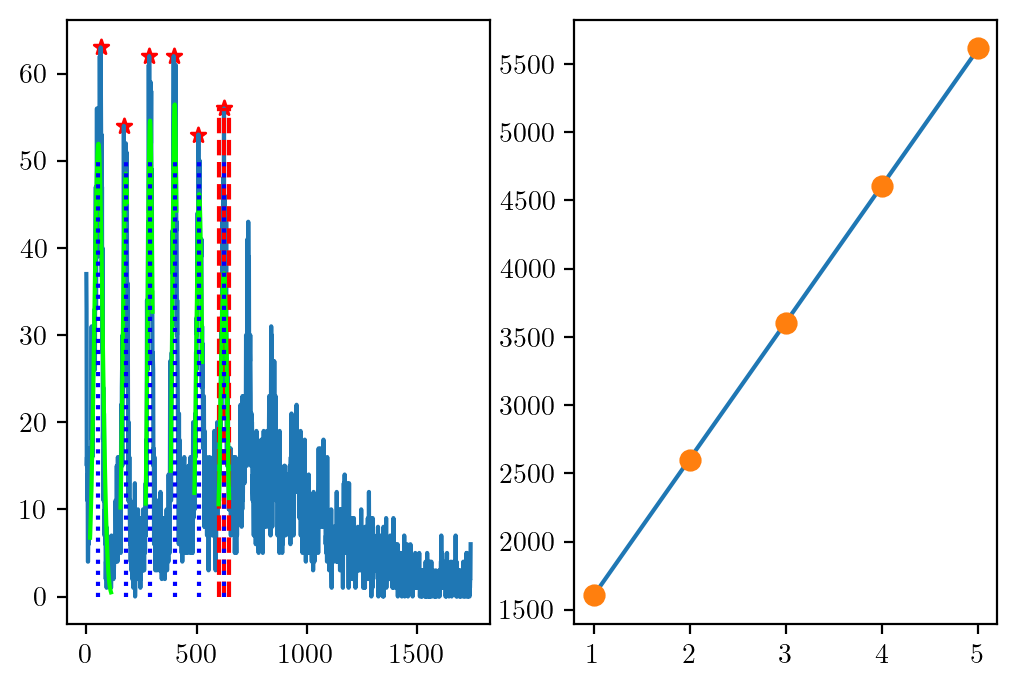

Gain 1001.1405325062058 and sigma 0.007765732516686344 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.7kHz/mca_keith_31.00OV_0.h5
32.0  @  0.7


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 2 to 6


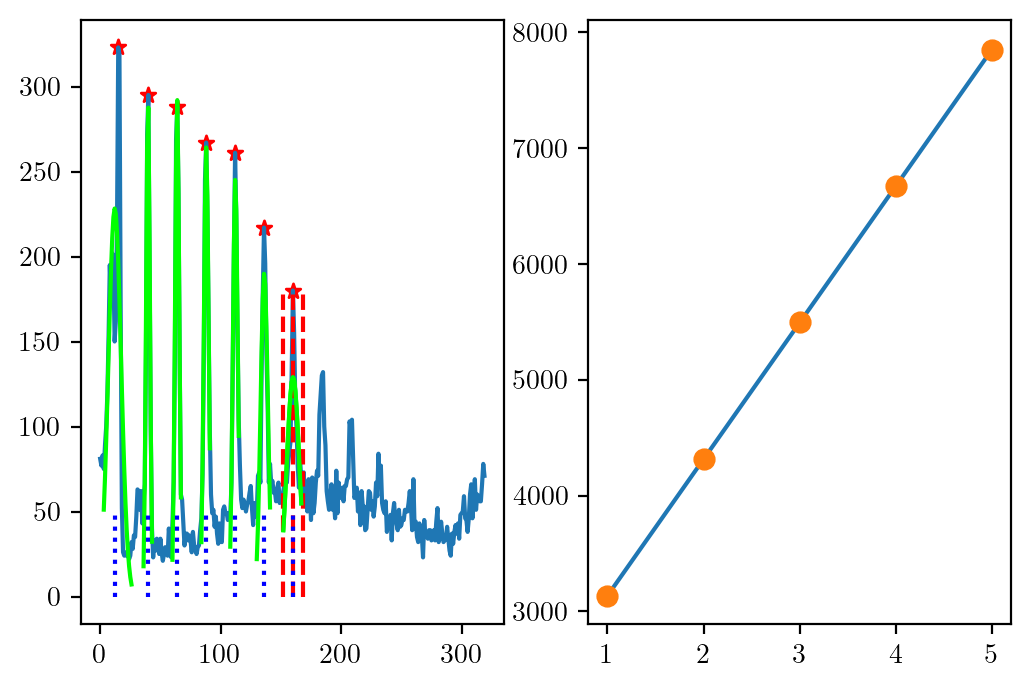

Gain 1178.726889131347 and sigma 0.005627659624086025 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.7kHz/mca_keith_32.00OV_0.h5
31.5  @  0.7


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 0 to 4


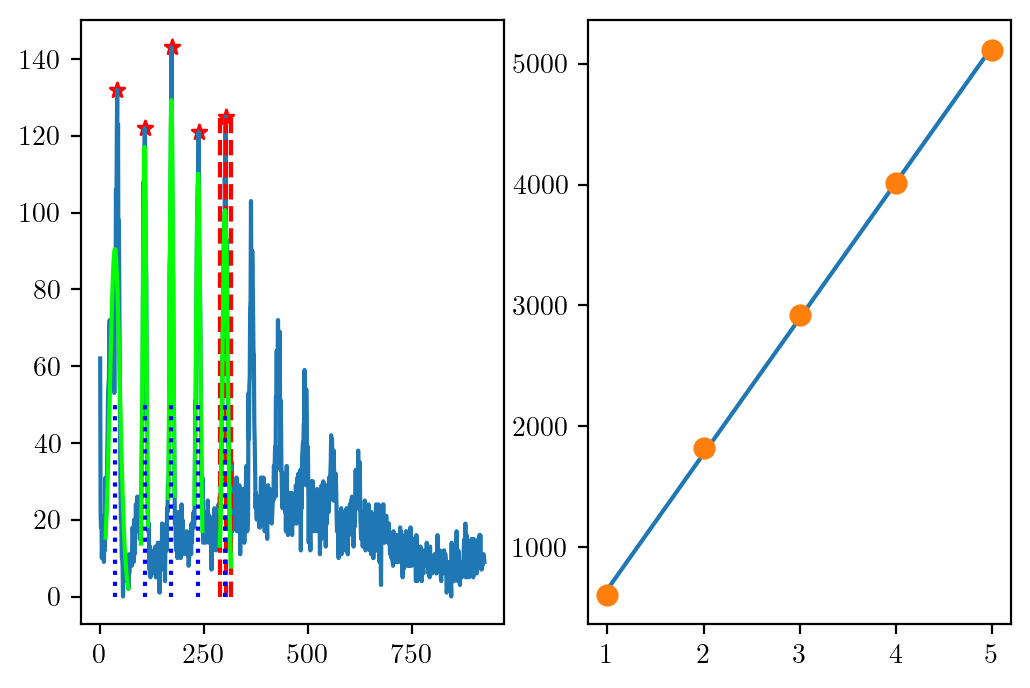

Gain 1121.418198612978 and sigma 0.034547718575267256 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.7kHz/mca_keith_31.50OV_0.h5
30.5  @  0.7


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 0 to 4


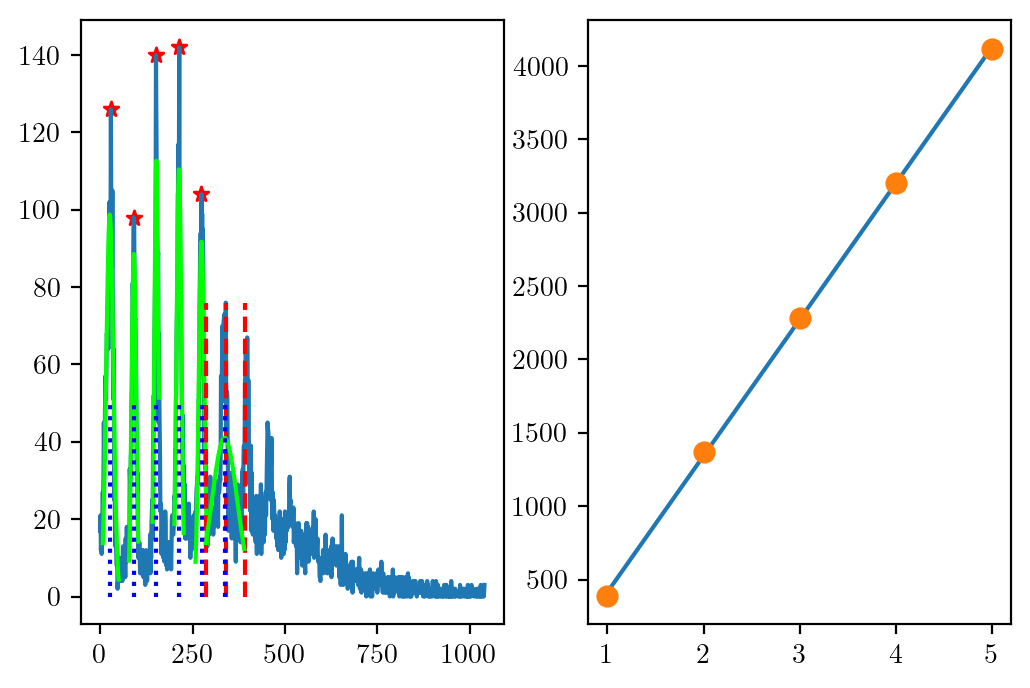

Gain 927.828816071426 and sigma 0.021462144537499592 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.7kHz/mca_keith_30.50OV_0.h5
30.0  @  0.6


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 3 to 7


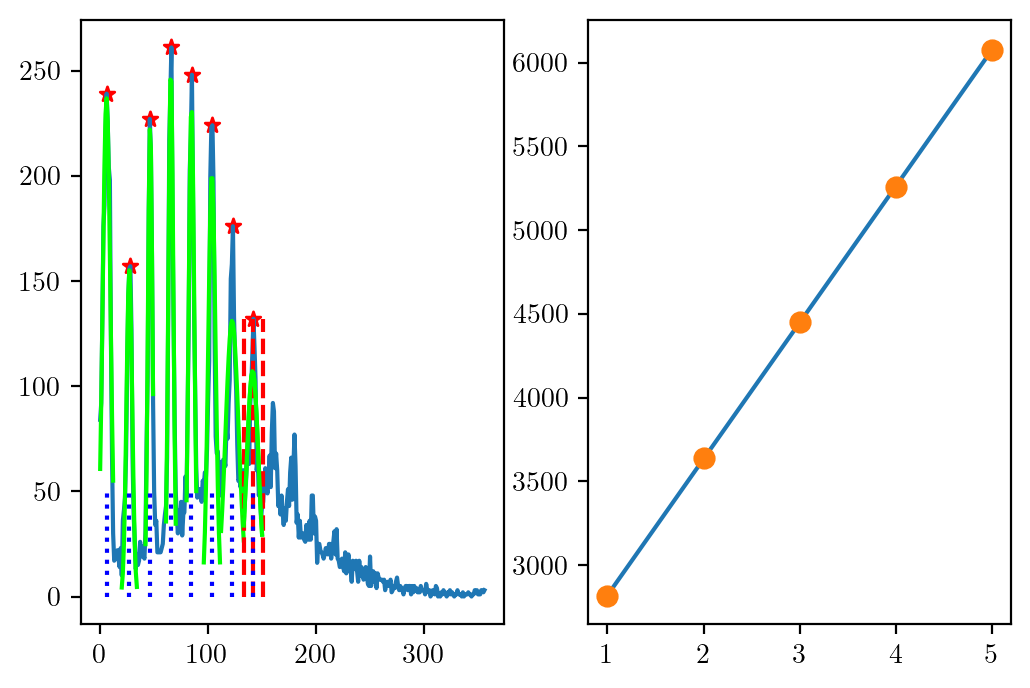

Gain 813.6697342459119 and sigma 0.009649115997162743 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.6kHz/mca_keith_30.00OV_0.h5
31.0  @  0.6


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 2 to 6


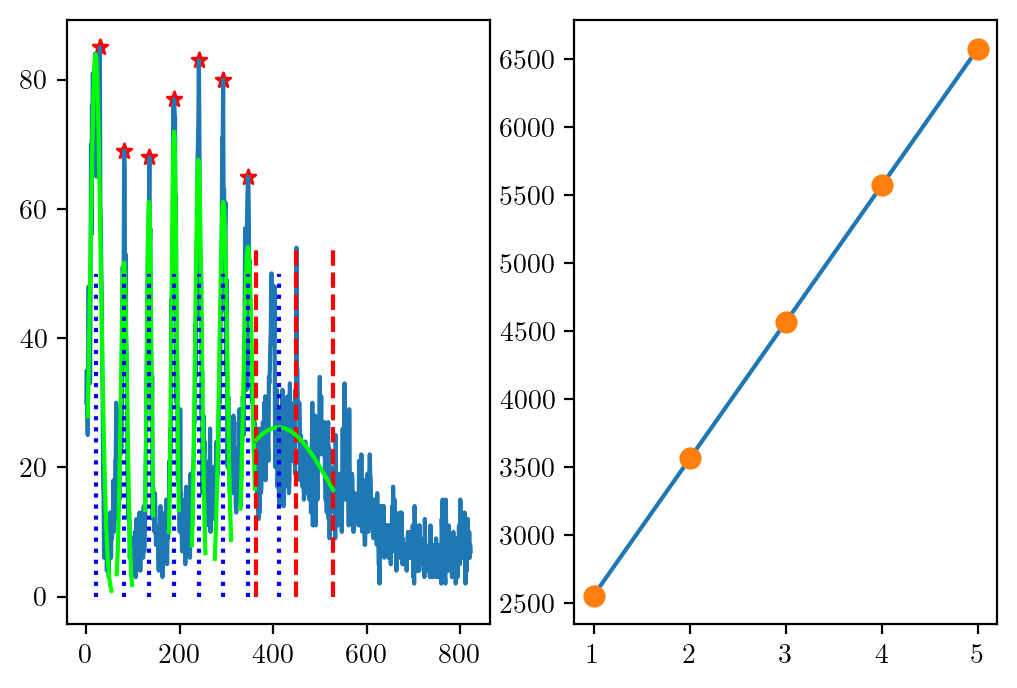

Gain 1004.7974685699708 and sigma 0.008098498823720707 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.6kHz/mca_keith_31.00OV_0.h5
32.5  @  0.6


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 1 to 5


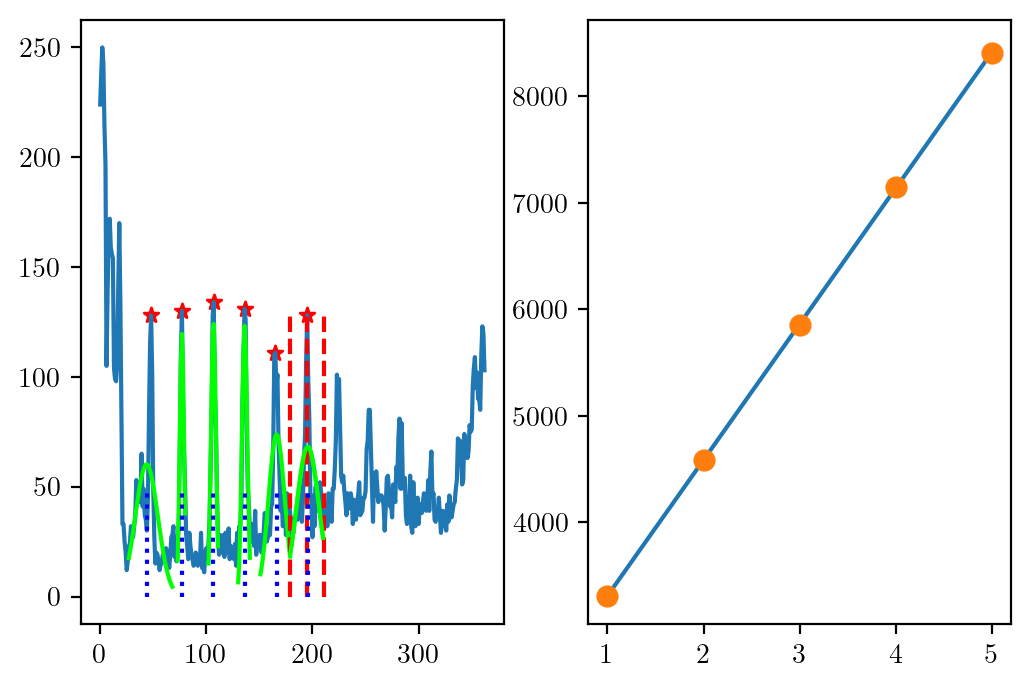

Gain 1275.9506165129035 and sigma 0.010497161898797002 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.6kHz/mca_keith_32.50OV_0.h5
32.0  @  0.6


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 0 to 4


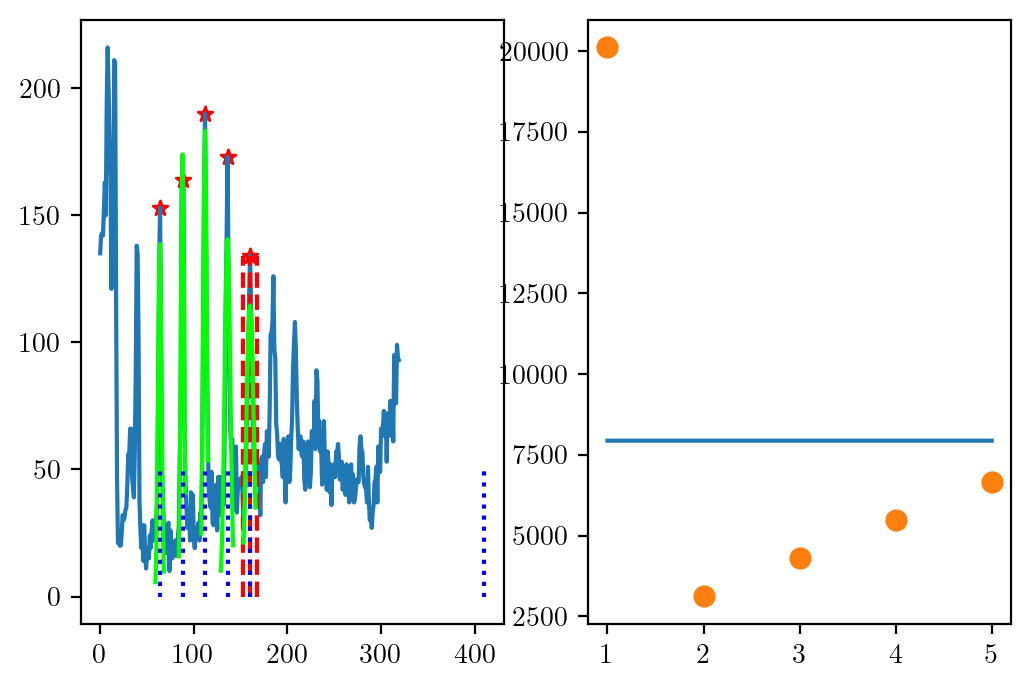

Gain 0.009068565452011793 and sigma 243266746424.046 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.6kHz/mca_keith_32.00OV_0.h5
31.5  @  0.6


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 1 to 5


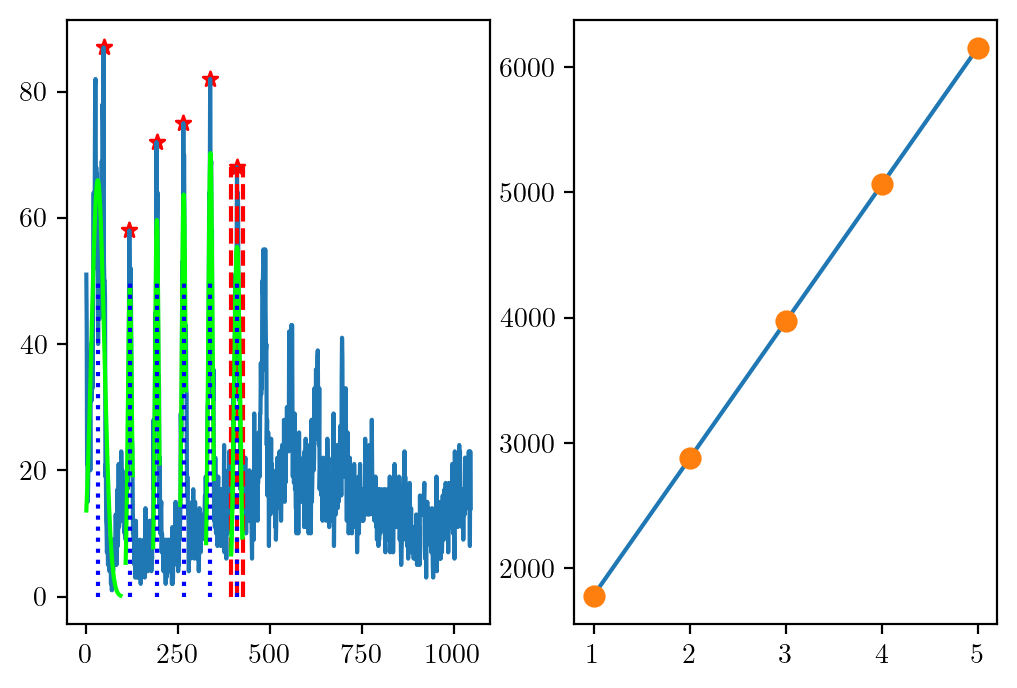

Gain 1093.656754944168 and sigma 0.0057829335269768654 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.6kHz/mca_keith_31.50OV_0.h5
30.5  @  0.6


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 5 to 9


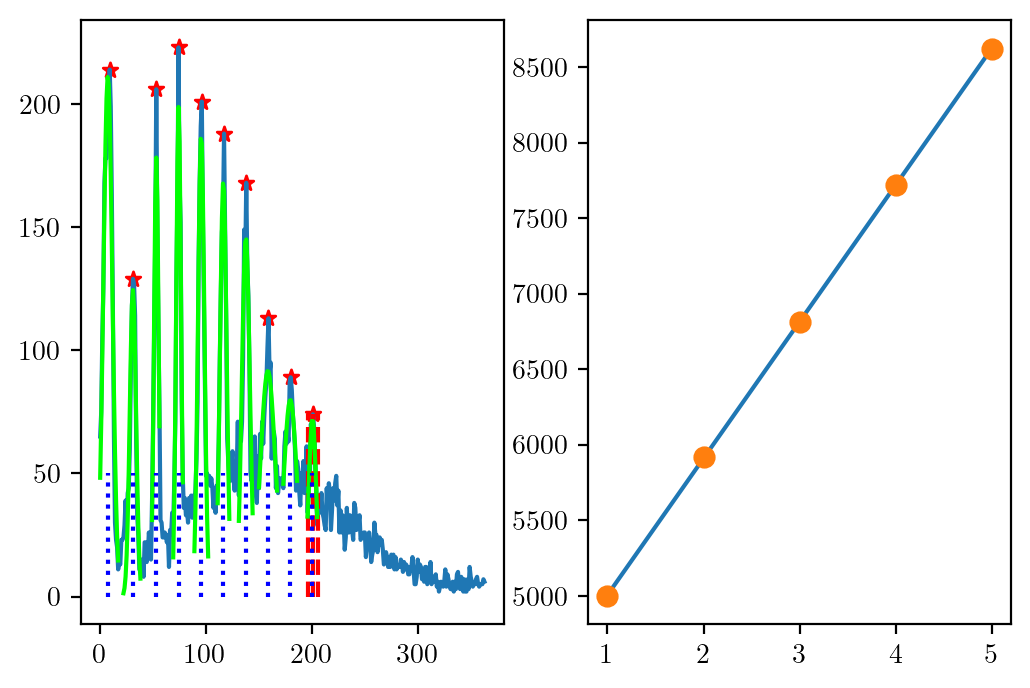

Gain 904.178690386088 and sigma 0.013479953778554637 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.6kHz/mca_keith_30.50OV_0.h5
30.0  @  0.5


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 1 to 5


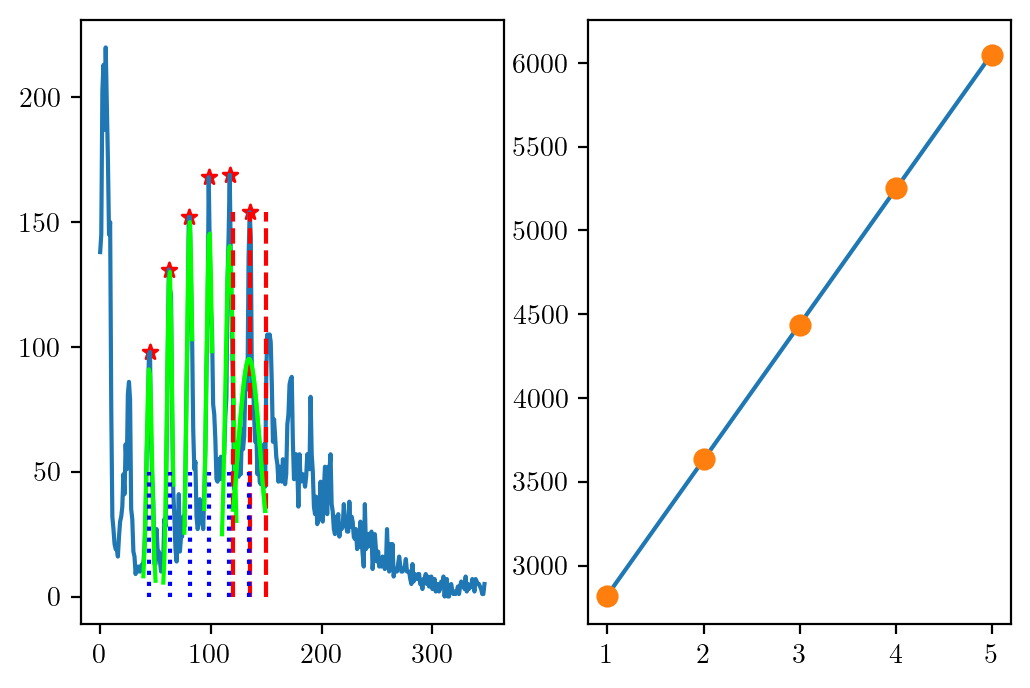

Gain 807.4442864769427 and sigma 0.010991590386172508 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.5kHz/mca_keith_30.00OV_0.h5
31.0  @  0.5


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 5 to 9


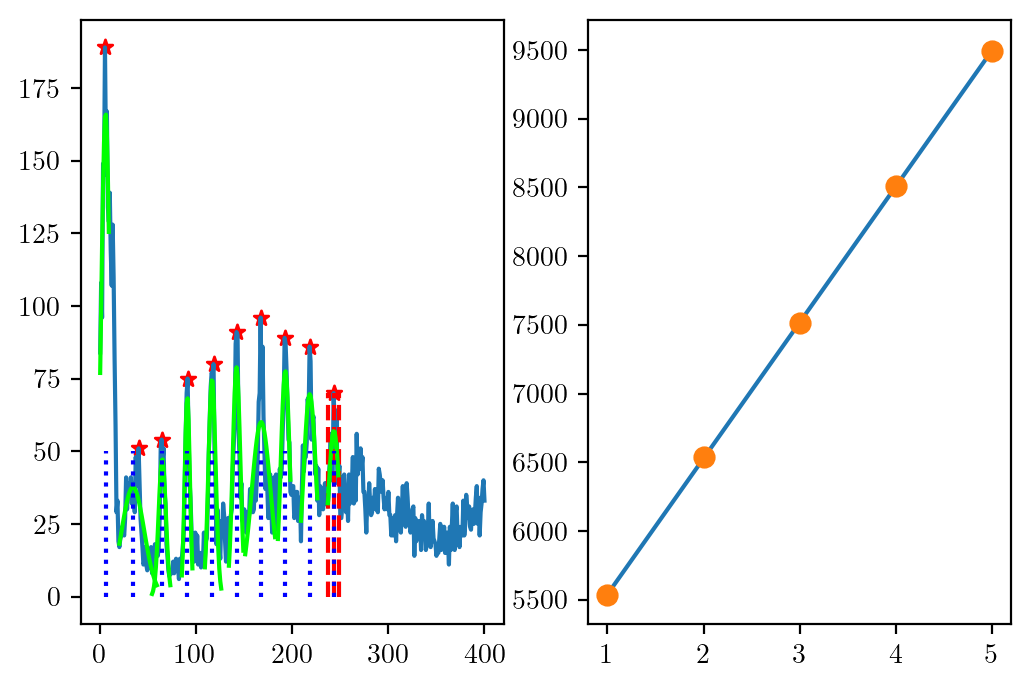

Gain 988.3635485906921 and sigma 0.014001920514950413 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.5kHz/mca_keith_31.00OV_0.h5
32.5  @  0.5


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 2 to 6


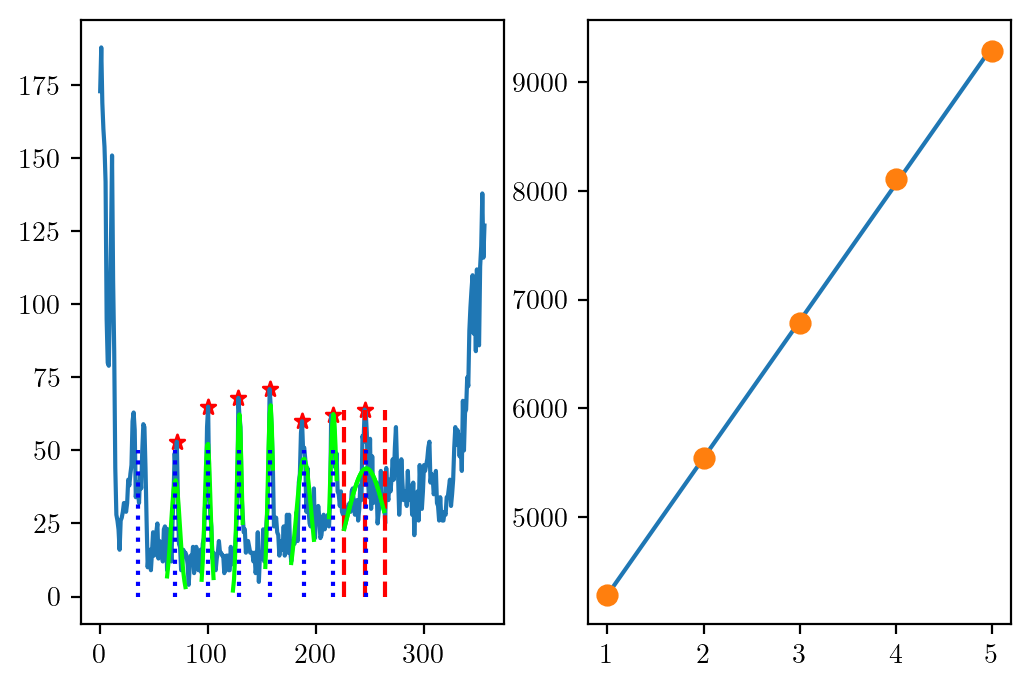

Gain 1258.8187990090955 and sigma 0.051796301034679186 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.5kHz/mca_keith_32.50OV_0.h5
32.0  @  0.5


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 2 to 6


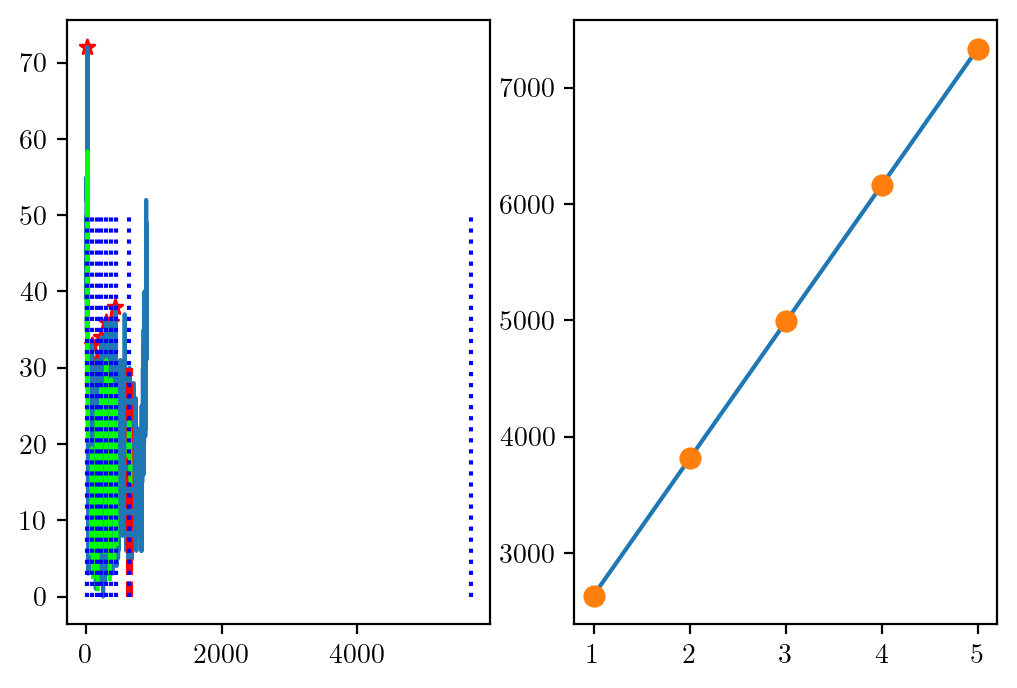

Gain 1175.4337725070866 and sigma 0.005618737034783928 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.5kHz/mca_keith_32.00OV_0.h5
31.5  @  0.5


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 1 to 5


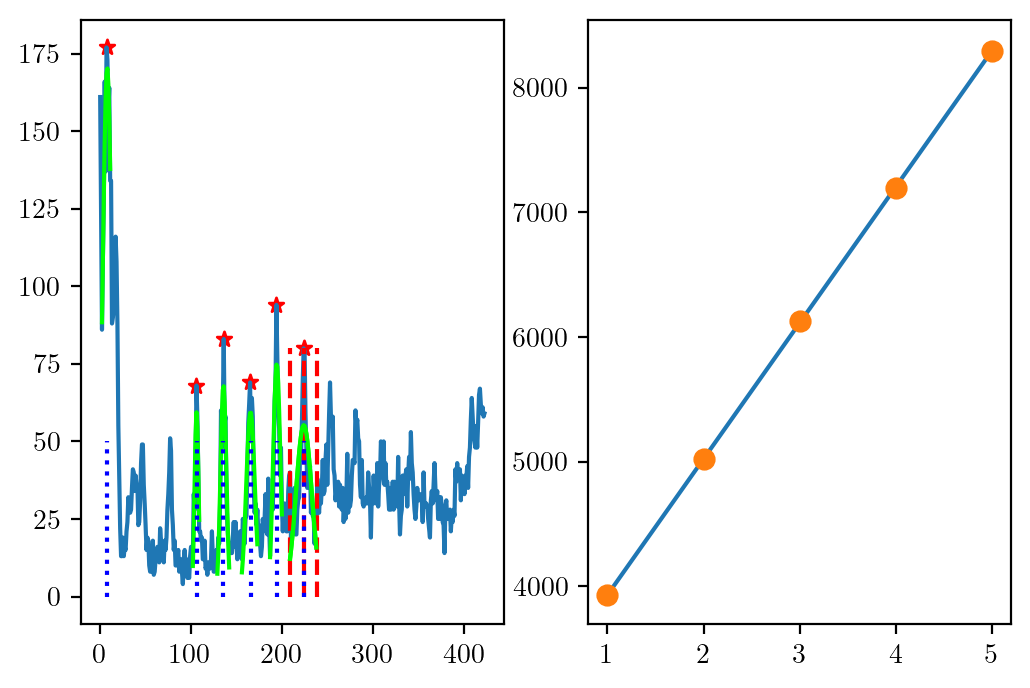

Gain 1090.8245135914287 and sigma 0.016373718321567192 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.5kHz/mca_keith_31.50OV_0.h5
30.5  @  0.5


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 6 to 10


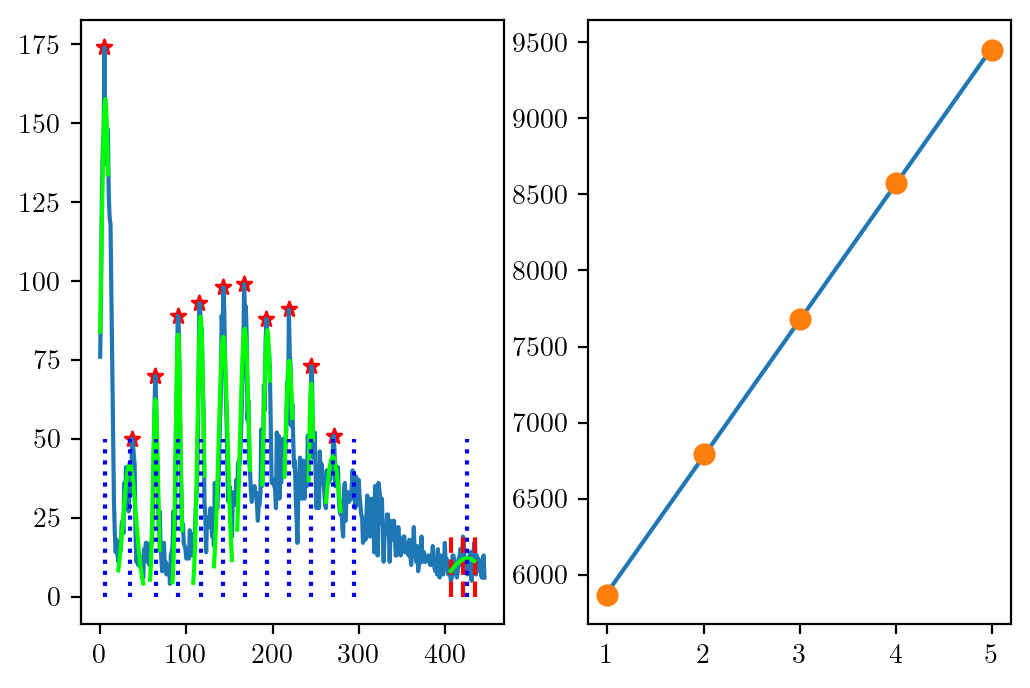

Gain 894.5638605808888 and sigma 0.04555883297315348 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/0.5kHz/mca_keith_30.50OV_0.h5
30.0  @  1.0


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 3 to 7


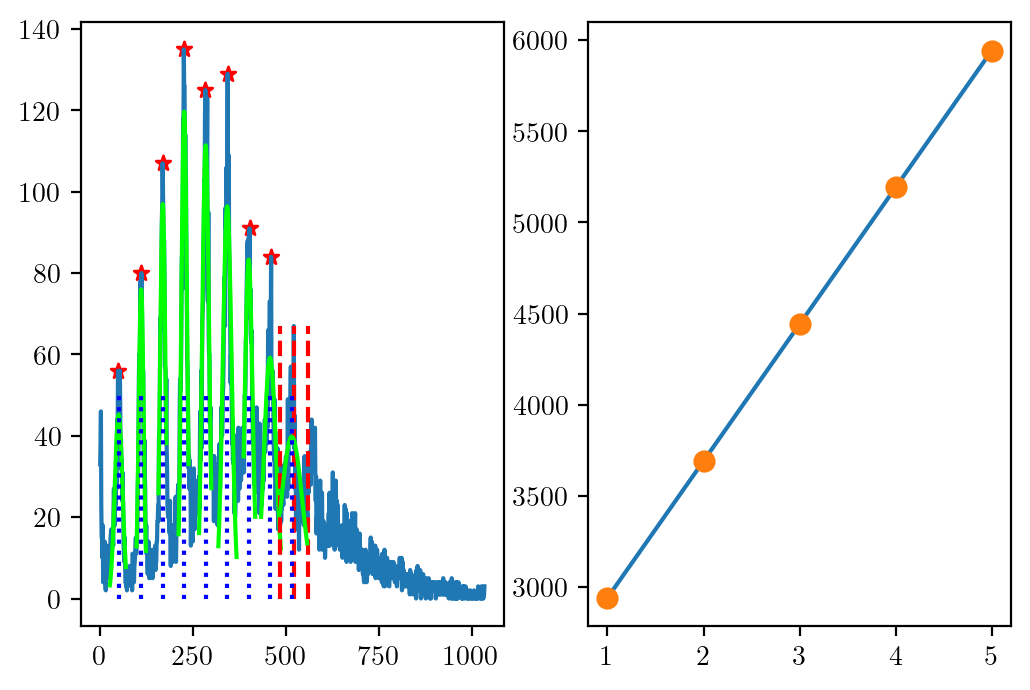

Gain 751.2031673517774 and sigma 0.006019759115877674 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/1.0kHz/mca_keith_30.00OV_0.h5
31.0  @  1.0


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 2 to 6


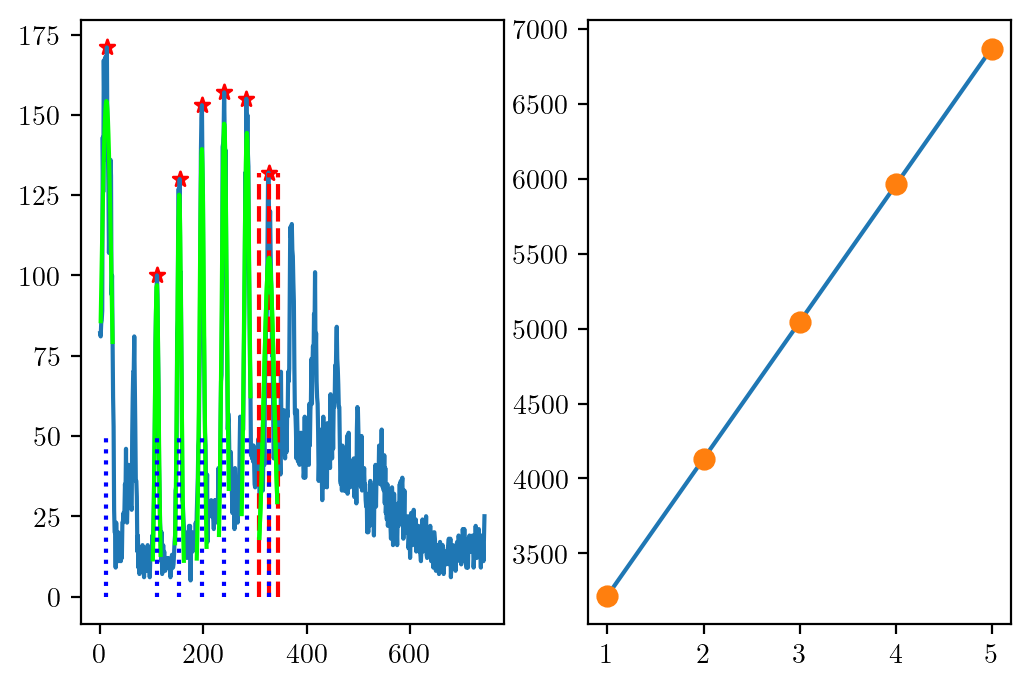

Gain 913.0564674859382 and sigma 0.010900781046559728 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/1.0kHz/mca_keith_31.00OV_0.h5
32.0  @  1.0


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 3 to 7


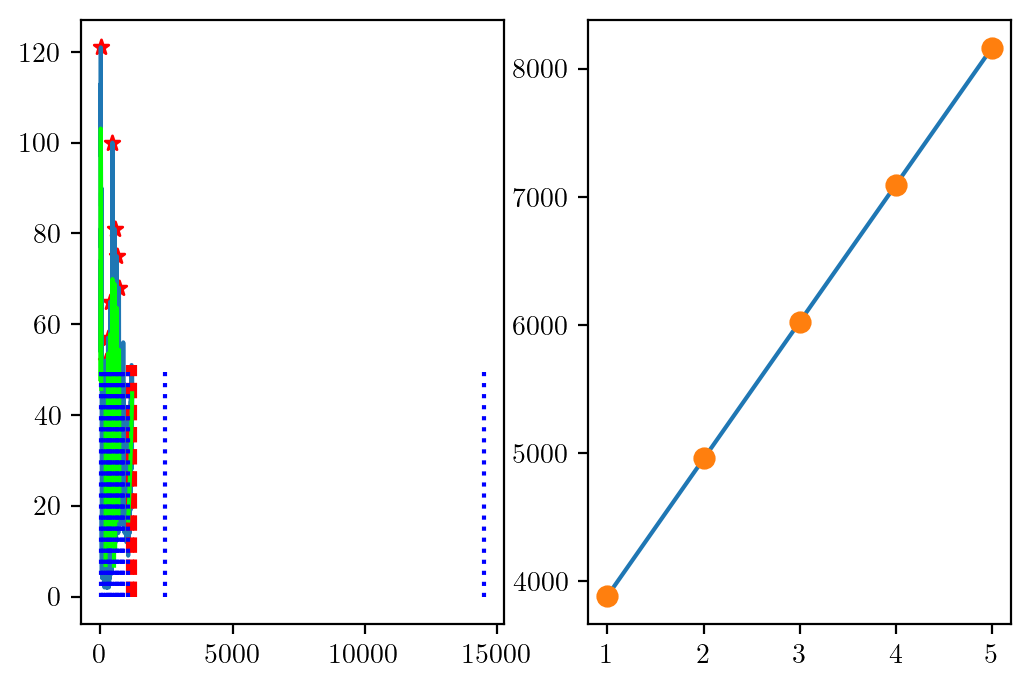

Gain 1068.1898306763035 and sigma 0.004802336954614162 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/1.0kHz/mca_keith_32.00OV_0.h5
31.5  @  1.0


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 4 to 8


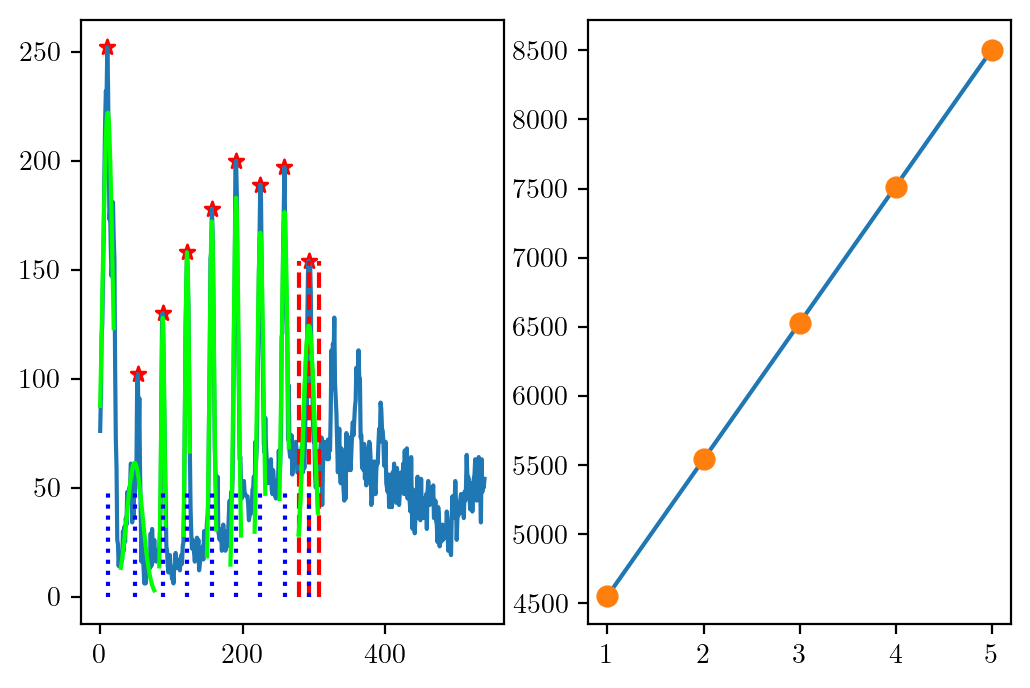

Gain 988.1968980941241 and sigma 0.0030796825321587605 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/1.0kHz/mca_keith_31.50OV_0.h5
30.5  @  1.0


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Best peaks are peaks 4 to 8


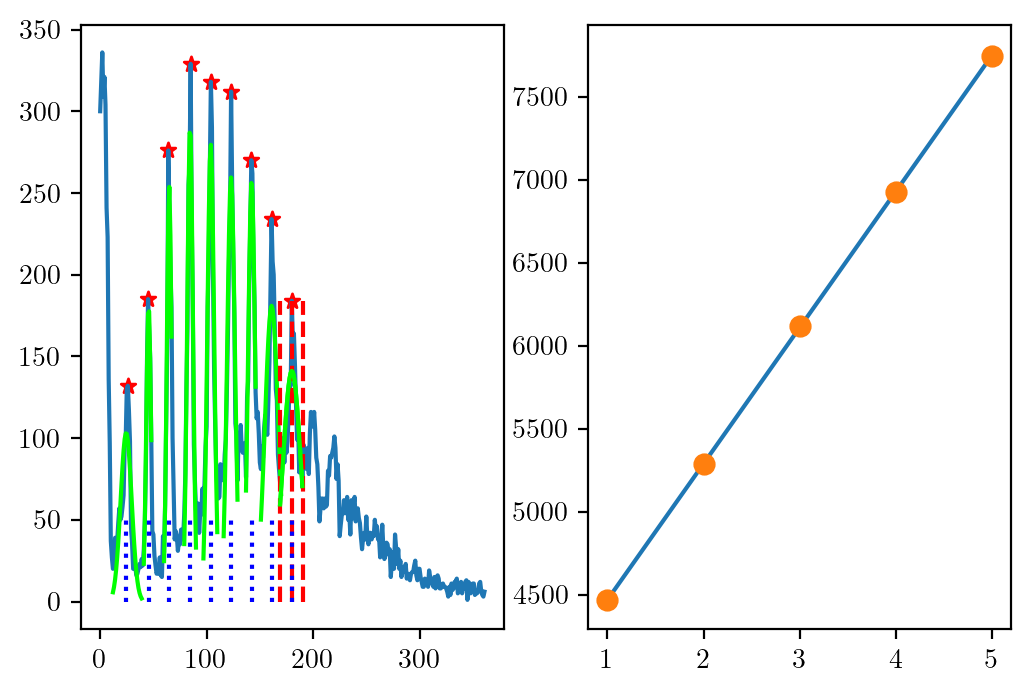

Gain 819.4242536274356 and sigma 0.018003322660118365 for /Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/1.0kHz/mca_keith_30.50OV_0.h5
30.0  @  10.0


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

Method failed


TypeError: 'NoneType' object is not subscriptable

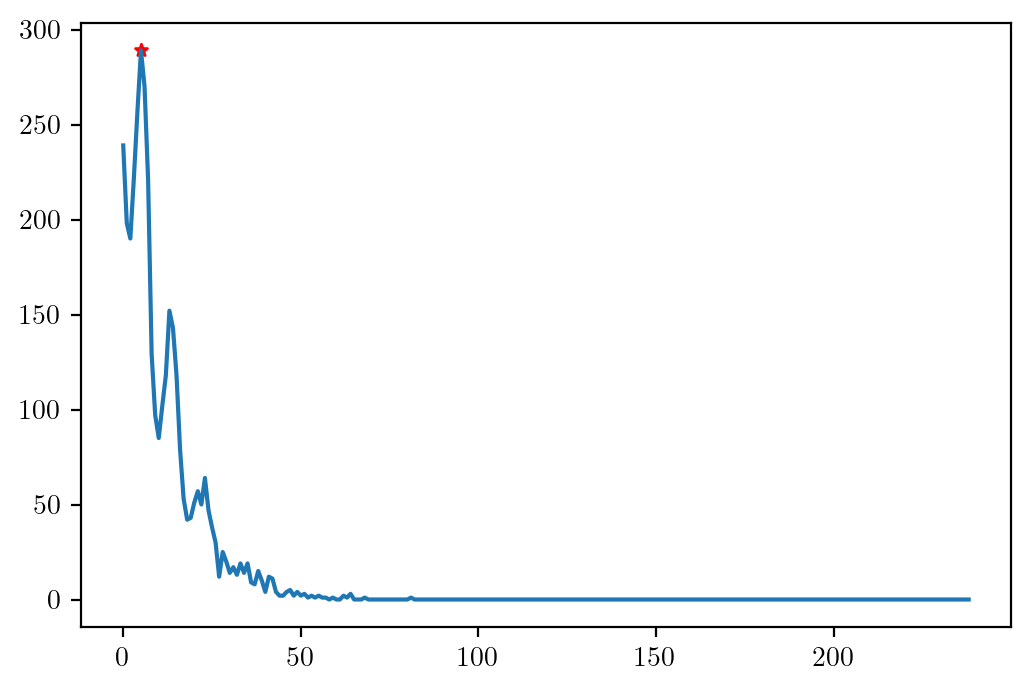

In [28]:
#FILE = r'/Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp/0.5kHz/mca_keith_30.00OV_0.h5'
#FILE = r'/Users/tizi/Documents/YALE_WL.nosync/data/20220810/4.0Vpp/0.5kHz/mca_keith_30.00OV_0.h5'

gains = []
sigmas = []
volts = []
frequencies = []

files = glob.glob(f'/Users/tizi/Documents/YALE_WL.nosync/data/20220812/4Vpp_2min_0.5V_intervals/**/*')
print(files)
for file in files:
    f = h5py.File(file, 'r')  
    ch2 = f.get('ch2')
    for key in ch2.keys(): 
        df = np.array(ch2.get(key))
    h = df
    hx = np.arange(0,len(h),1)
    x,y = hx, h
    pind, pdict = find_peaks(y, prominence=2000)
    plt.rcParams['figure.dpi']= 200

    voltage = file.split('_')[-2]
    voltage = float(voltage.split('OV')[0])

    frequency = float(file.split('/')[-2].split('kHz')[0])
    print(voltage,' @ ',frequency)

    plt.plot(x,y)

    rix_ind = 0
    lix_ind = 0
    rix_ind_ar = x[int(pind):][y[int(pind):] <= pdict['right_bases']]
    if len(rix_ind_ar) == 0: rix_ind = (len(x)-1)
    else: rix_ind = rix_ind_ar[0]
    lix_ind_ar = x[:int(pind)][y[:int(pind)] <= pdict['left_bases']]
    if len(lix_ind_ar) == 0: lix_ind = 0
    else: lix_ind = lix_ind_ar[0]

    plt.vlines(np.asarray([pind,lix_ind,rix_ind]),0,pdict['prominences'].max(),colors=['red'])
    plt.vlines(np.asarray([pdict['left_bases'],pdict['right_bases']]),0,pdict['prominences'].max(),colors=['blue'])
    plt.xlim(lix_ind-10,rix_ind+300)
    plt.clf()
    x = x[int(pdict['right_bases']):]
    y = y[int(pdict['right_bases']):]
    plt.plot(x,y)
    plt.clf()

    x1, y1 = rebin(x,y,100)
    plt.plot(x1,y1)
    plt.clf()
    from timeit import repeat
    from ipywidgets import IntProgress
    from IPython.display import display
    import itertools

    bin_start = 5
    bin_stop = 50
    bin_step = 2 #  DO NOT SET THIS TO FLOAT VALUES --> REBIN ONLY TAKES INTS AND CONVERTS TO INT ANYWAY!!!!!!

    prominence_start = 8
    prominence_stop = 100
    prominence_step = 2

    distance_start = 5
    distance_stop = 50
    distance_step = 2
    #1250/bins

    min_peaks = 5
    max_error = 1.5

    perms = [item for item in itertools.product(np.arange(bin_start, bin_stop,bin_step),np.arange(prominence_start, prominence_stop,prominence_step))]

    #print(len(perms))
    trials = {}
    lowest = 300
    best = None
    final_gains = []
    final_gain_errs = []
    final_peaks_start = []
    best_index = None

    f = IntProgress(value=0,min=0,max=len(perms),step=1,description='Loading MCA perms...',bar_style='info',layout={"width": "100%"})
    display(f)

    for p in perms:

        plt.clf()
        f.value += 1
        bins = p[0]
        #bins = 30
        prominence = p[1]
        #prominence = 10
        distance = 500/bins
        try:
            x1, y1 = rebin(x,y,bins)

            pks, pdict = find_peaks(y1,prominence=prominence,distance=distance)
            if len(pks) < min_peaks: pass#continue
            plt.scatter([pks],[y1[pks]],20,'red','*')

            # x2 = np.flip(x1)
            # y2 = np.flip(y1)
            # flat_end = np.argwhere(y2 > 2)[0][0]
            # x2 = x2[flat_end:]
            # y2 = y2[flat_end:]
            # x1 = np.flip(x2)
            # y1 = np.flip(y2)

            plt.plot(x1,y1)
            #plt.show()

            cumulative = 0

            counter = 0
            fitted = []

            for ii in np.arange(0,len(pks),1):
                tolerance = 0.2
                y_cut = y1
                ##print()
                while len(find_peaks(y_cut,prominence=prominence,distance=distance)[0]) > 1 and tolerance < 0.8:
                    index = pks[ii]
                    #peak_lx = pdict['left_bases'][ii]
                    #peak_rx = pdict['right_bases'][ii]
                    peak_lx, peak_rx = None, None
                    try: peak_lx = int(index - np.argwhere(np.flip(y1[:index]) < tolerance*y1[index])[0][0]*1.1)
                    except: peak_lx = pdict['left_bases'][ii]
                    try: peak_rx = int((index + np.argwhere(y1[index:] < tolerance*y1[index])[0][0])*1.1)
                    except: peak_rx = pdict['right_bases'][ii]
                    x_cut = x1[int(peak_lx):peak_rx]
                    y_cut = y1[int(peak_lx):peak_rx]
                    ##print(f'{ii+1}/{len(pks)} L {peak_lx}, R: {peak_rx}')

                    #plt.plot(x_cut,y_cut,color='magenta',lw=0.8)
                    if len(find_peaks(y_cut,prominence=prominence)[0]) > 1:
                        ##print('Too many peaks in cut')
                        tolerance += 0.05
                        continue
                    ##print(f'{ii+1}/{len(pks)} L {peak_lx}, R: {peak_rx}')
                    ##print(peak_widths(y1,pks,rel_height=5)[0][ii])
                #plt.scatter(index,[y1[index]],20,'red','*')

                if np.abs(np.abs(index-peak_lx) - np.abs(peak_rx-index)) > np.abs(index-peak_lx)*0.2:
                    peak_rx = index + np.abs(index-peak_lx)
                    ##print(f'Fixing right base... -> L {peak_lx}, R: {peak_rx}')
                    x_cut = x1[int(peak_lx):peak_rx]
                    y_cut = y1[int(peak_lx):peak_rx]
                    #plt.plot(x_cut,y_cut,color='blue',lw=0.8)

                sigma = np.abs(int(index - np.argwhere(np.flip(y1[:index]) < 0.5*y1[index])[0][0]))

                try:popt, pcov = curve_fit(gauss,x_cut,y_cut,p0=[y1[index],np.abs(index-peak_lx),sigma],maxfev=10000000)
                except Exception as e:
                    #print(e)
                    continue
                perr = np.sqrt(np.diag(pcov))[1]
                ##print(perr)
                if np.sqrt(np.diag(pcov))[1] > max_error:
                    #plt.show()
                    continue
                counter += 1
                fitted.append(pks[ii])
                perr = np.sqrt(np.diag(pcov))[1]
                #plt.plot(x_cut,gauss(x_cut,*popt),color='lime')
                #plt.show()
                cumulative += perr

            if counter < min_peaks: continue

            lowest2 = 1000
            index = 0
            popt, pcov, perr = None, None, None

            for ii in np.arange(0,len(fitted)-(min_peaks-1)):
                peaks = fitted[ii:ii+min_peaks]
                perrs = fitted[ii:ii+min_peaks]
                try: popt,pcov = curve_fit(line,np.arange(1,(min_peaks+1)),peaks,maxfev=100000)
                except: continue
                perr = np.sqrt(np.diag(pcov))[1]
                #print(ii, ' ', popt,' ', perr)
                if perr < lowest:
                    lowest2 = perr
                    index = ii

            if lowest2 == 1000 or popt is None: continue
            else:
                final_gains.append(popt[0])
                final_gain_errs.append(perr)
                final_peaks_start.append(index)
                if perr < lowest:
                    lowest = perr
                    best = p
                    best_index = len(final_gains)-1
                trials[p] = perr

            #plt.clf()
            #plt.plot(x1,y1)
            for ftd in fitted:
                pass#plt.scatter([pks[ftd]],[y1[pks[ftd]]],20,'green','*')

            ##print(p,end=' -> ')
            ##print(cumulative)

        except Exception as e:
            #print(e)
            continue
        #plt.show()
    #print(best)

    """print(best)
    print(best_index)
    print(final_gains)
    print(final_gain_errs)
    print(final_peaks_start)"""

    final_peaks = []
    final_perrs = []

    if best is None: print('Method failed')
    else:
        bins = best[0]
        prominence = best[1]
        distance = 500/bins
        x1, y1 = rebin(x,y,bins)

        pks, pdict = find_peaks(y1,prominence=prominence,distance=distance)

        x2 = np.flip(x1)
        y2 = np.flip(y1)
        flat_end = np.argwhere(y2 > 2)[0][0]
        x2 = x2[flat_end:]
        y2 = y2[flat_end:]
        x1 = np.flip(x2)
        y1 = np.flip(y2)
        plt.clf()
        plt.subplot(1,2,1)
        plt.plot(x1,y1)
        fitted = []
        for ii in np.arange(0,len(pks),1):
            tolerance = 0.2
            y_cut = y1
            ##print()
            while len(find_peaks(y_cut,prominence=prominence,distance=distance)[0]) > 1 and tolerance < 0.8:
                index = pks[ii]
                #peak_lx = pdict['left_bases'][ii]
                #peak_rx = pdict['right_bases'][ii]
                peak_lx, peak_rx = None, None
                try: peak_lx = int(index - np.argwhere(np.flip(y1[:index]) < tolerance*y1[index])[0][0]*1.1)
                except: peak_lx = pdict['left_bases'][ii]
                try: peak_rx = int((index + np.argwhere(y1[index:] < tolerance*y1[index])[0][0])*1.1)
                except: peak_rx = pdict['right_bases'][ii]
                x_cut = x1[int(peak_lx):peak_rx]
                y_cut = y1[int(peak_lx):peak_rx]
                ##print(f'{ii+1}/{len(pks)} L {peak_lx}, R: {peak_rx}')

                #plt.plot(x_cut,y_cut,color='magenta',lw=0.8)
                if len(find_peaks(y_cut,prominence=prominence)[0]) > 1:
                    ##print('Too many peaks in cut')
                    tolerance += 0.05
                    continue
                ##print(f'{ii+1}/{len(pks)} L {peak_lx}, R: {peak_rx}')
                ##print(peak_widths(y1,pks,rel_height=5)[0][ii])

            if np.abs(np.abs(index-peak_lx) - np.abs(peak_rx-index)) > np.abs(index-peak_lx)*0.2:
                peak_rx = index + np.abs(index-peak_lx)
                #print(f'Fixing right base... -> L {peak_lx}, R: {peak_rx}')
                x_cut = x1[int(peak_lx):peak_rx]
                y_cut = y1[int(peak_lx):peak_rx]
                #plt.plot(x_cut,y_cut,color='blue',lw=0.8)

            try:sigma = np.abs(int(index - np.argwhere(np.flip(y1[:index]) < 0.5*y1[index])[0][0]))
            except: sigma = np.abs(index-peak_lx)*0.5

            try:popt, pcov = curve_fit(gauss,x_cut,y_cut,p0=[y1[index],np.abs(index-peak_lx),sigma],maxfev=10000000)
            except Exception as e:
                #print(e)
                continue
            perr = np.sqrt(np.diag(pcov))[1]
            #print(popt,' ',perr)
            final_peaks.append(popt[1])
            final_perrs.append(perr)
            if np.sqrt(np.diag(pcov))[1] > max_error:
                #plt.show()
                continue
            counter += 1
            fitted.append(ii)
            perr = np.sqrt(np.diag(pcov))[1]
            plt.plot(x_cut,gauss(x_cut,*popt),color='lime')
            #plt.show()
        for ftd in fitted:
            plt.scatter([pks[ftd]],[y1[pks[ftd]]],30,'red','*')

        distances = []
        sorted_peaks = np.sort(pks)
        for i in np.arange(2,len(sorted_peaks),1):
            #prev = np.abs(sorted_peaks[i-1]-sorted_peaks[i-2])
            #curr = np.abs(sorted_peaks[i]-sorted_peaks[i-1])
            distances.append(np.abs(sorted_peaks[i]-sorted_peaks[i-1]))
        #print(distances)

        plt.vlines([peak_lx,peak_rx,index],0,y1[index],colors=['red'],linestyles='dashed')
        plt.plot(x1[peak_lx:peak_rx],gauss(x1[peak_lx:peak_rx],*popt),color='lime')
        plt.vlines(final_peaks,0,50,colors=['blue'],linestyles='dotted')
        #plt.xlim(0,250)
        #plt.show()
        #print(final_peaks)
        #print(final_perrs)
        #print(best)

    x3, y3 = rebin(x,y,best[0])

    plt.subplot(1,2,2)

    ii = final_peaks_start[best_index]
    peaks = final_peaks[ii:ii+min_peaks]
    perrs = final_perrs[ii:ii+min_peaks]
    popt,pcov = None, None
    try: popt,pcov = curve_fit(line,np.arange(1,(min_peaks+1)),peaks,maxfev=100000)
    except: continue
    perr = np.sqrt(np.diag(pcov))[1]
    #print(ii, ' ', popt,' ', perr)

    print(f'Best peaks are peaks {ii} to {ii+(min_peaks-1)}')

    peaks = np.asarray(final_peaks[ii:ii+min_peaks])*best[0]
    perrs = np.asarray(final_perrs[ii:ii+min_peaks])*best[0]
    try: popt,pcov = curve_fit(line,np.arange(1,(min_peaks+1)),peaks,maxfev=100000)
    except: continue
    plt.plot(np.arange(1,(min_peaks+1)),line(np.arange(1,(min_peaks+1)),*popt))
    #plt.scatter(np.arange(1,5),peaks,10)
    plt.xlim(0,len(h)/best[0])
    plt.errorbar(np.arange(1,(min_peaks+1)),peaks,yerr=perrs,fmt='o',ms=7,)
    plt.show()

    gains.append(popt[0])
    sigmas.append(np.sqrt(np.diag(pcov))[1]*best[0])
    volts.append(voltage)
    frequencies.append(frequency)
    print(f'Gain {popt[0]} and sigma {np.sqrt(np.diag(pcov))[1]} for {file}')

In [29]:
for ii, voltage in enumerate(volts):
    print(f'- {voltage:.02f}V @ {frequencies[ii]:.01f}kHz -> Gain {gains[ii]} +/- {sigmas[ii]}')

- 30.00V @ 5.0kHz -> Gain 534.8640632429268 +/- 1.6322473856128672
- 31.00V @ 5.0kHz -> Gain 631.8034537143408 +/- 1.424598532158658
- 32.00V @ 5.0kHz -> Gain 729.1374390868267 +/- 2.6451508339003302
- 31.50V @ 5.0kHz -> Gain 683.3641223353955 +/- 0.01192581902439603
- 30.50V @ 5.0kHz -> Gain 587.4431687908593 +/- 0.1852056775827957
- 30.00V @ 0.9kHz -> Gain 731.5893012780083 +/- 3.3790497794349386
- 31.00V @ 0.9kHz -> Gain 916.2535485104102 +/- 0.035345534593446803
- 32.00V @ 0.9kHz -> Gain 1056.5614435845891 +/- 1.300754258802422
- 31.50V @ 0.9kHz -> Gain 992.5559897725487 +/- 0.04540795229146443
- 30.50V @ 0.9kHz -> Gain 814.8034820264272 +/- 6.443713834761759
- 30.00V @ 0.8kHz -> Gain 748.4729586892943 +/- 0.2680908010679906
- 31.00V @ 0.8kHz -> Gain 895.7725616898342 +/- 2.6920707301401205
- 32.00V @ 0.8kHz -> Gain 1055.8005363969282 +/- 0.9862055326733964
- 31.50V @ 0.8kHz -> Gain 988.7514168804701 +/- 0.07221751321425847
- 30.50V @ 0.8kHz -> Gain 826.4510901174921 +/- 0.50159066

['30.0@5.0', '31.0@5.0', '32.0@5.0', '31.5@5.0', '30.5@5.0', '30.0@0.9', '31.0@0.9', '32.0@0.9', '31.5@0.9', '30.5@0.9', '30.0@0.8', '31.0@0.8', '32.0@0.8', '31.5@0.8', '30.5@0.8', '30.0@0.7', '31.0@0.7', '32.0@0.7', '31.5@0.7', '30.5@0.7', '30.0@0.6', '31.0@0.6', '32.5@0.6', '32.0@0.6', '31.5@0.6', '30.5@0.6', '30.0@0.5', '31.0@0.5', '32.5@0.5', '32.0@0.5', '31.5@0.5', '30.5@0.5', '30.0@1.0', '31.0@1.0', '32.0@1.0', '31.5@1.0', '30.5@1.0']
30.0@0.5
30.5@0.5
31.0@0.5
31.5@0.5
32.0@0.5
32.5@0.5
30.0@0.6
30.5@0.6
31.0@0.6
31.5@0.6
32.0@0.6
32.5@0.6
30.0@0.7
30.5@0.7
31.0@0.7
31.5@0.7
32.0@0.7
32.5@0.7
30.0@0.8
30.5@0.8
31.0@0.8
31.5@0.8
32.0@0.8
32.5@0.8
30.0@0.9
30.5@0.9
31.0@0.9
31.5@0.9
32.0@0.9
32.5@0.9
30.0@1.0
30.5@1.0
31.0@1.0
31.5@1.0
32.0@1.0
32.5@1.0
30.0@5.0
30.5@5.0
31.0@5.0
31.5@5.0
32.0@5.0
32.5@5.0


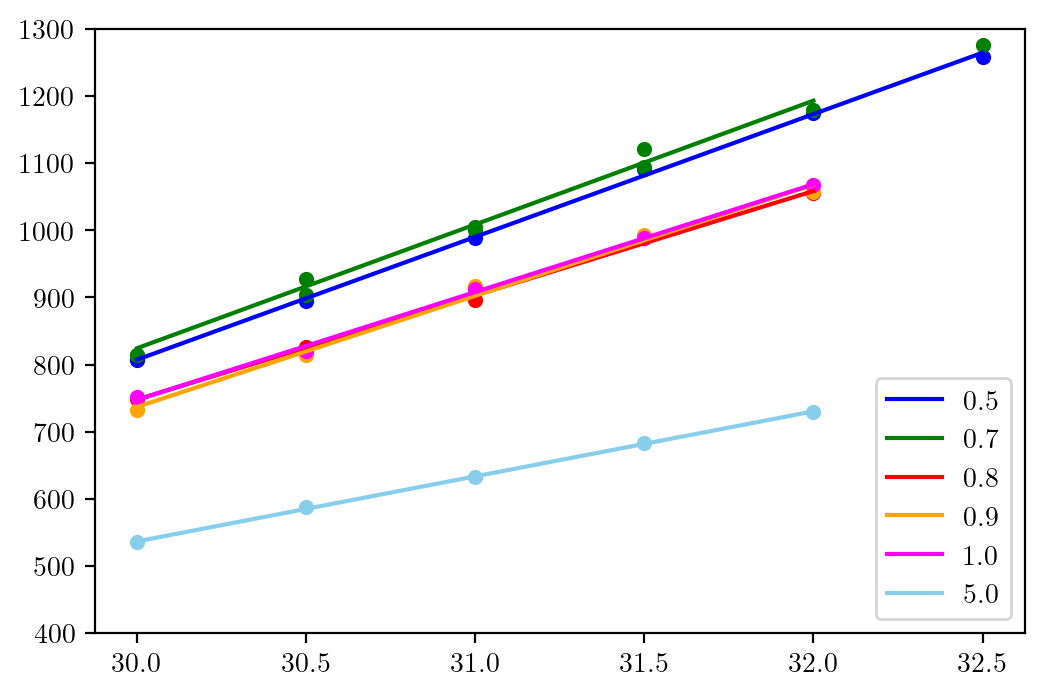

In [43]:
to_plot_inds = []
to_plot_vals = []
for ind in np.arange(0,len(volts)):
    to_plot_inds.append(str(volts[ind])+str('@')+str(frequencies[ind]))
    to_plot_vals.append((gains[ind],sigmas[ind]))
uniqe_freq = np.unique(frequencies)
unique_volts = np.unique(volts)
print(to_plot_inds)

colors = ['blue', 'green', 'red', 'orange', 'magenta', 'skyblue', 'brown']
next_color = colors[0]
for uf in uniqe_freq:
    line_vals = []
    err_vals = []
    volt_vals = []
    for uv in unique_volts:
        key = str(uv)+str('@')+str(uf)
        print(key)
        try:index = np.argwhere(np.asarray(to_plot_inds) == key)[0][0]
        except: continue
        gain, sigma = to_plot_vals[index]
        plt.scatter([uv], [gain],20,color=next_color)
        line_vals.append(gain)
        err_vals.append(sigma)
        volt_vals.append(uv)

    try:popt,pcov = curve_fit(line,volt_vals,line_vals)
    except: continue
    plt.plot(volt_vals,line(volt_vals,*popt),label=uf,color=next_color)
    next_color = colors[np.argwhere(np.asarray(colors) == next_color)[0][0]+1]
plt.legend(loc='lower right')
plt.ylim(400,1300)
plt.show()